In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('C:\\Users\\DELL\\Desktop\\Fliprobo Projects\\ibm-hr-analytics-employee-attrition-performance.zip')

In [3]:
print('No of Rows:',df.shape[0])
print('No of Columns:',df.shape[1])
pd.set_option('display.max_columns', None) # This will enable us to see truncated columns
df.head()

No of Rows: 1470
No of Columns: 35


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [4]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [6]:
df.columns.to_series().groupby(df.dtypes).groups

{int64: ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EmployeeNumber', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager'], object: ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']}

## Statistical Analysis

Before Going for Statistical exploration of data, first check integrity of data & Missing value

## Data Integrity Check

In [7]:
df.duplicated().sum()

0

## Missing value check

In [8]:
missing_values = df.isnull().sum().sort_values(ascending = False)
percentage_missing_values =(missing_values/len(df))*100
print(pd.concat([missing_values, percentage_missing_values], axis =1, keys =['Missing Values', '% Missing data']))

                          Missing Values  % Missing data
Age                                    0             0.0
StandardHours                          0             0.0
NumCompaniesWorked                     0             0.0
Over18                                 0             0.0
OverTime                               0             0.0
PercentSalaryHike                      0             0.0
PerformanceRating                      0             0.0
RelationshipSatisfaction               0             0.0
StockOptionLevel                       0             0.0
MonthlyIncome                          0             0.0
TotalWorkingYears                      0             0.0
TrainingTimesLastYear                  0             0.0
WorkLifeBalance                        0             0.0
YearsAtCompany                         0             0.0
YearsInCurrentRole                     0             0.0
YearsSinceLastPromotion                0             0.0
MonthlyRate                    

## Statistical Matrix

<Axes: >

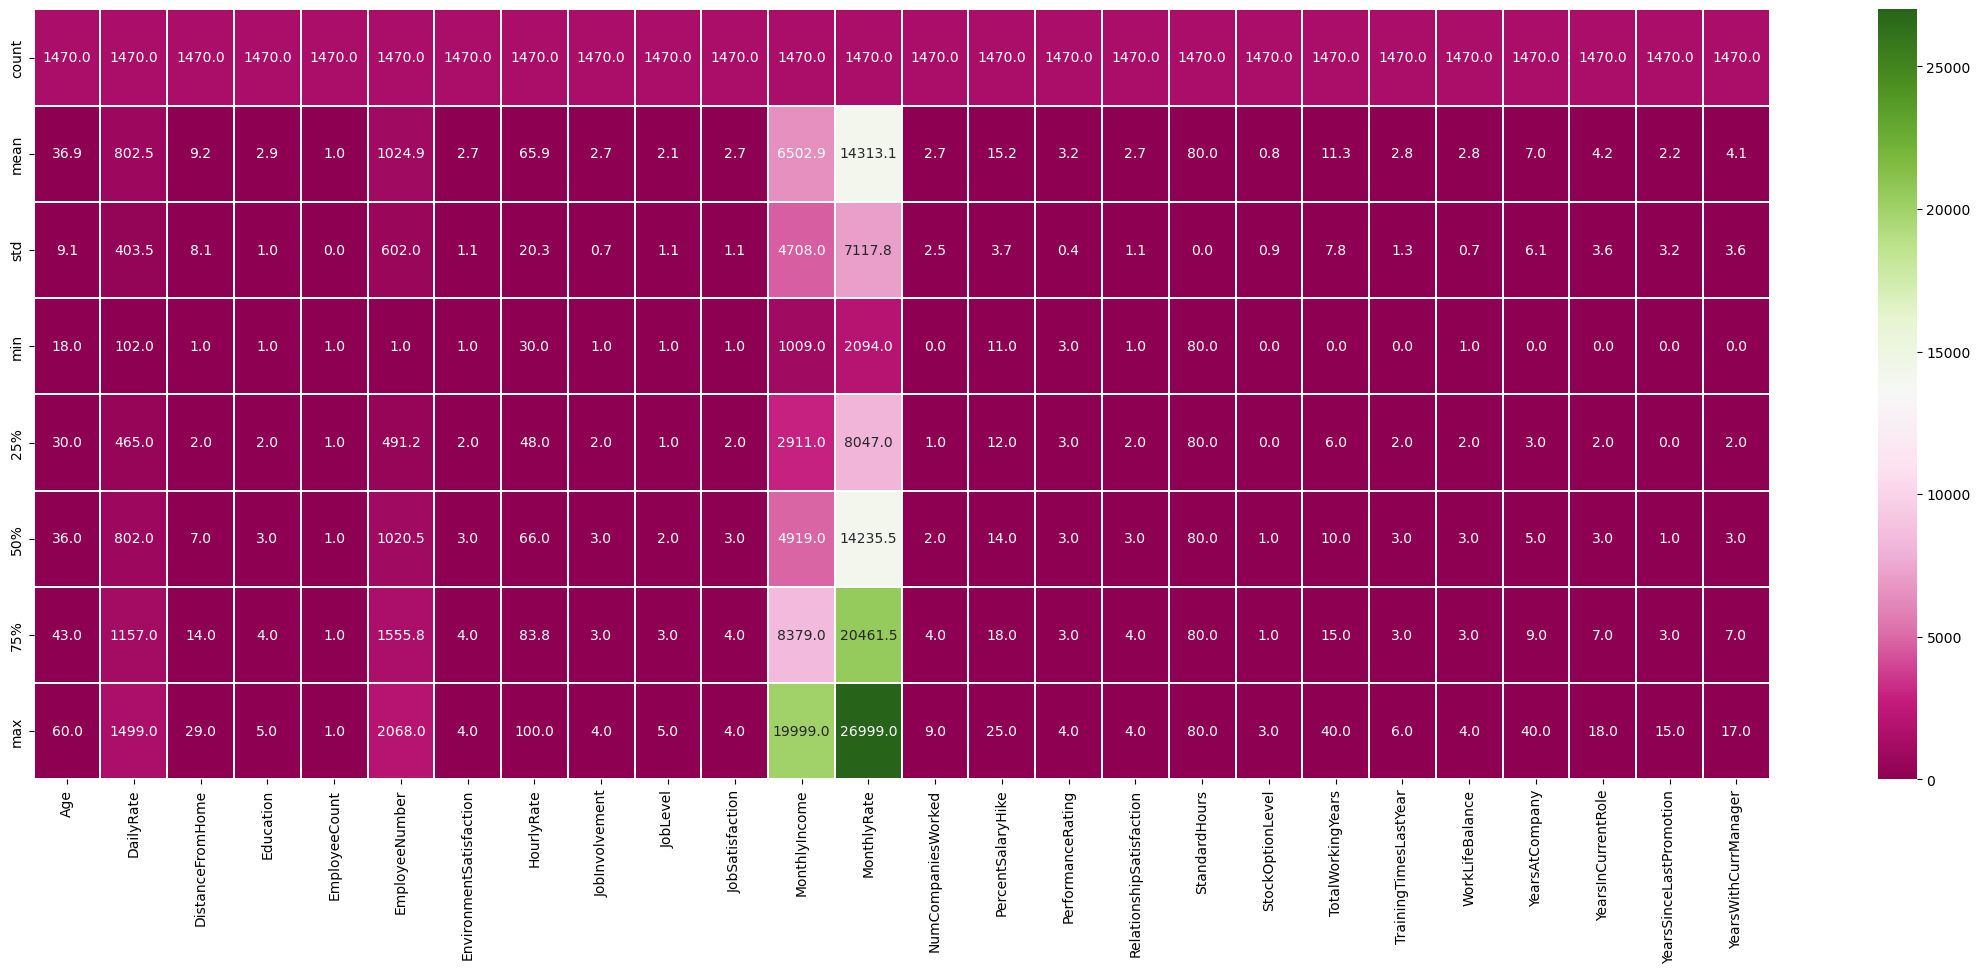

In [9]:
plt.figure(figsize=(28,10))
sns.heatmap(df.describe(),linewidths = 0.1,fmt='0.1f',annot = True,cmap='PiYG')

In [10]:
df.describe().T.round(3)

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.924,9.135,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.486,403.509,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.193,8.107,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.913,1.024,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000,0.000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865,602.024,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.722,1.093,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891,20.329,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.730,0.712,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.064,1.107,1.0,1.00,2.0,3.00,5.0


In [11]:
#Lets do some Statistical Analysis. Start with target Variable.

In [12]:
df['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

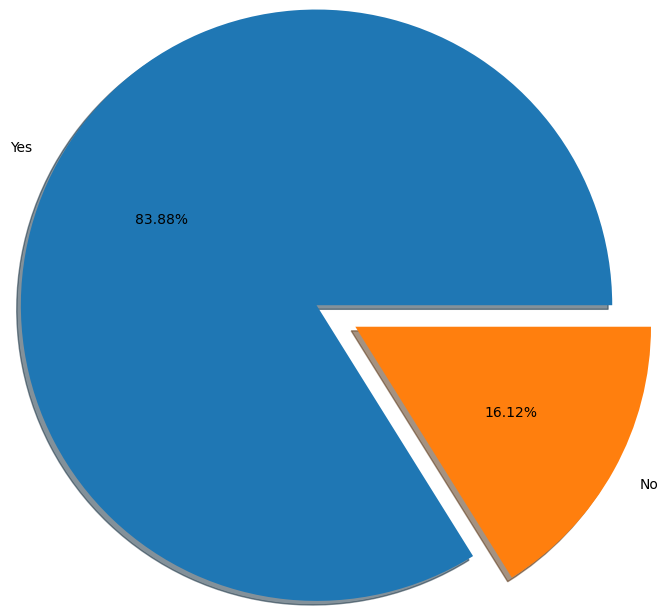

In [13]:
labels = 'Yes','No',
fig, ax = plt.subplots()
ax.pie(df['Attrition'].value_counts(),labels = labels,radius =2,autopct = '%2.2f%%',explode=[0.1,0.2], shadow=True,)
plt.show()

83.88% (1237 employees) Employees did not leave the organization while 16.12% (237 employees) did leave the organization making our dataset to be considered imbalanced since more people stay in the organization than they actually leave.

In [14]:
Category=['Attrition', 'BusinessTravel', 'Department', 'EducationField',
          'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime' ]
for i in Category:
    print(i)
    print(df[i].value_counts())
    print("="*100)


Attrition
No     1233
Yes     237
Name: Attrition, dtype: int64
BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
Department
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
EducationField
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
Gender
Male      882
Female    588
Name: Gender, dtype: int64
JobRole
Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64
MaritalStatus
Married     673
Single      470
Divorced    327
Name: MaritalStatus, dtyp

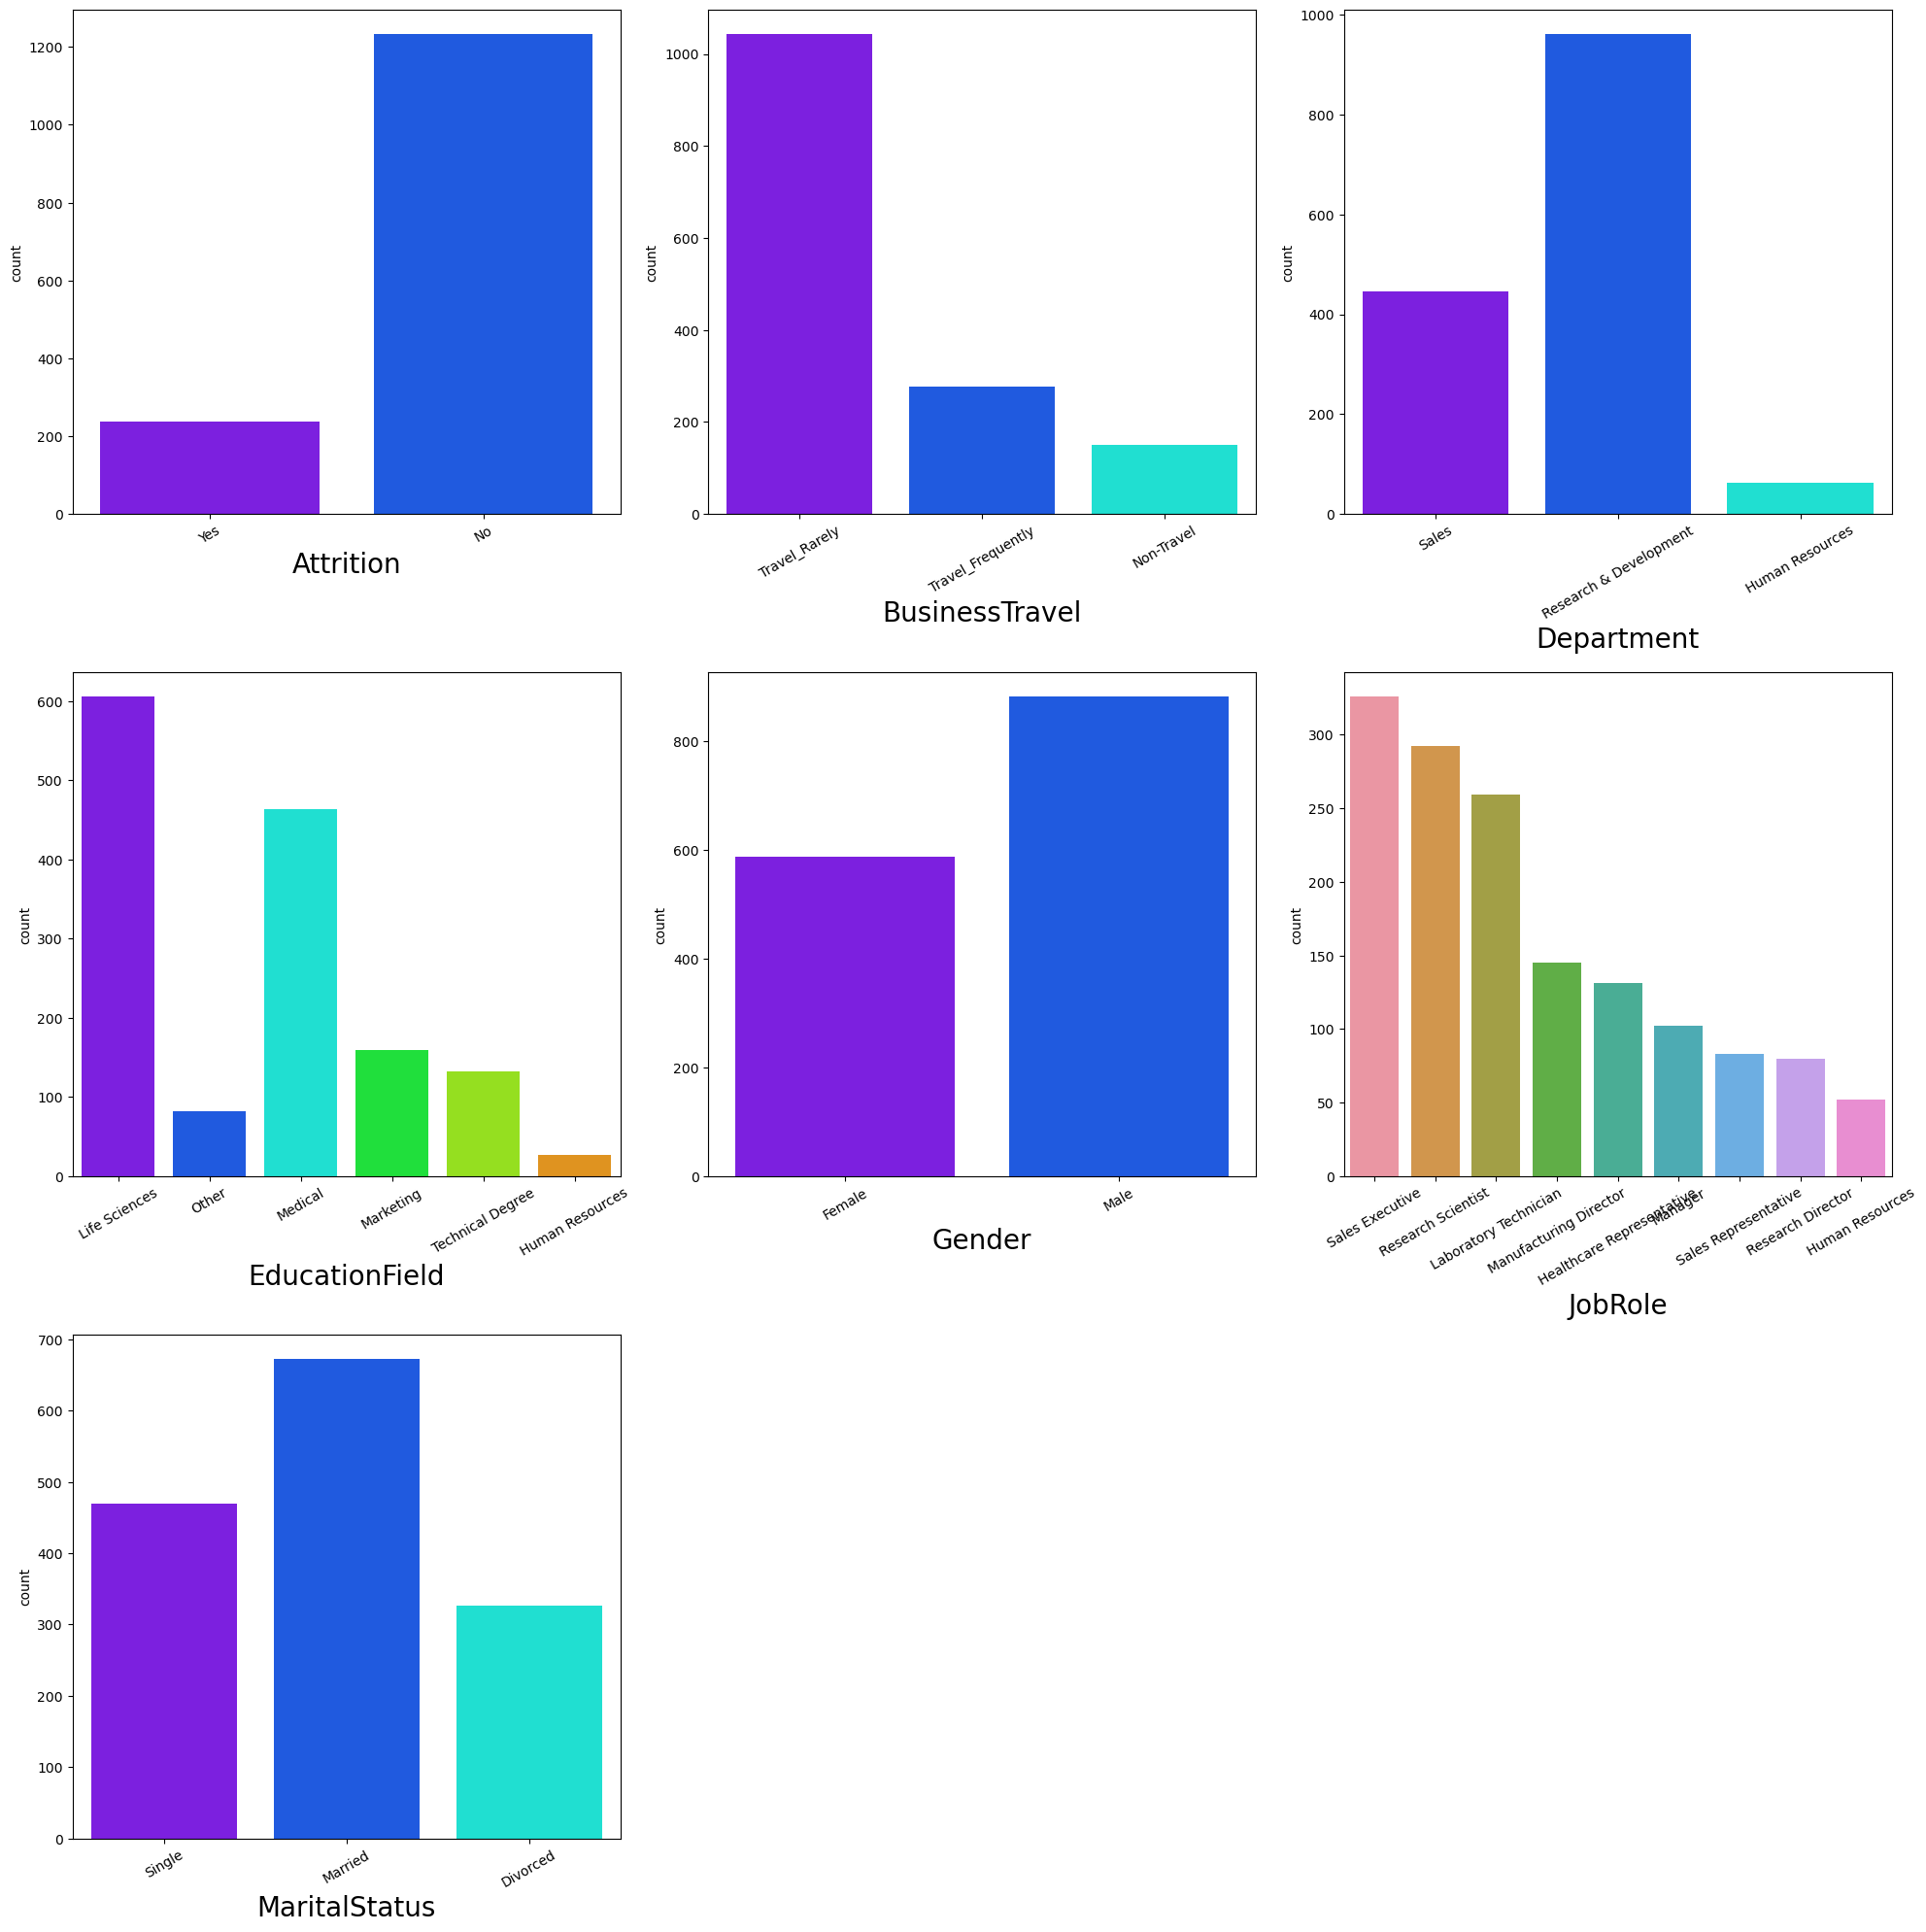

In [15]:
sns.set_palette('gist_rainbow_r')
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1
Category = ['Attrition', 'BusinessTravel', 'Department', 'EducationField',
            'Gender', 'JobRole', 'MaritalStatus']

for i in Category:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(data=df, x=i)
        plt.xlabel(i, fontsize=20)
        plt.xticks(rotation=30)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Enlisting Value counts & Sub-categories of different Ordinal features available

In [16]:
Ordinal=['Education','EnvironmentSatisfaction', 'JobInvolvement','JobSatisfaction',
          'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance' ]
for i in Ordinal:
    print(i)
    print(df[i].value_counts())
    print("="*100)

Education
3    572
4    398
2    282
1    170
5     48
Name: Education, dtype: int64
EnvironmentSatisfaction
3    453
4    446
2    287
1    284
Name: EnvironmentSatisfaction, dtype: int64
JobInvolvement
3    868
2    375
4    144
1     83
Name: JobInvolvement, dtype: int64
JobSatisfaction
4    459
3    442
1    289
2    280
Name: JobSatisfaction, dtype: int64
RelationshipSatisfaction
3    459
4    432
2    303
1    276
Name: RelationshipSatisfaction, dtype: int64
PerformanceRating
3    1244
4     226
Name: PerformanceRating, dtype: int64
WorkLifeBalance
3    893
2    344
4    153
1     80
Name: WorkLifeBalance, dtype: int64


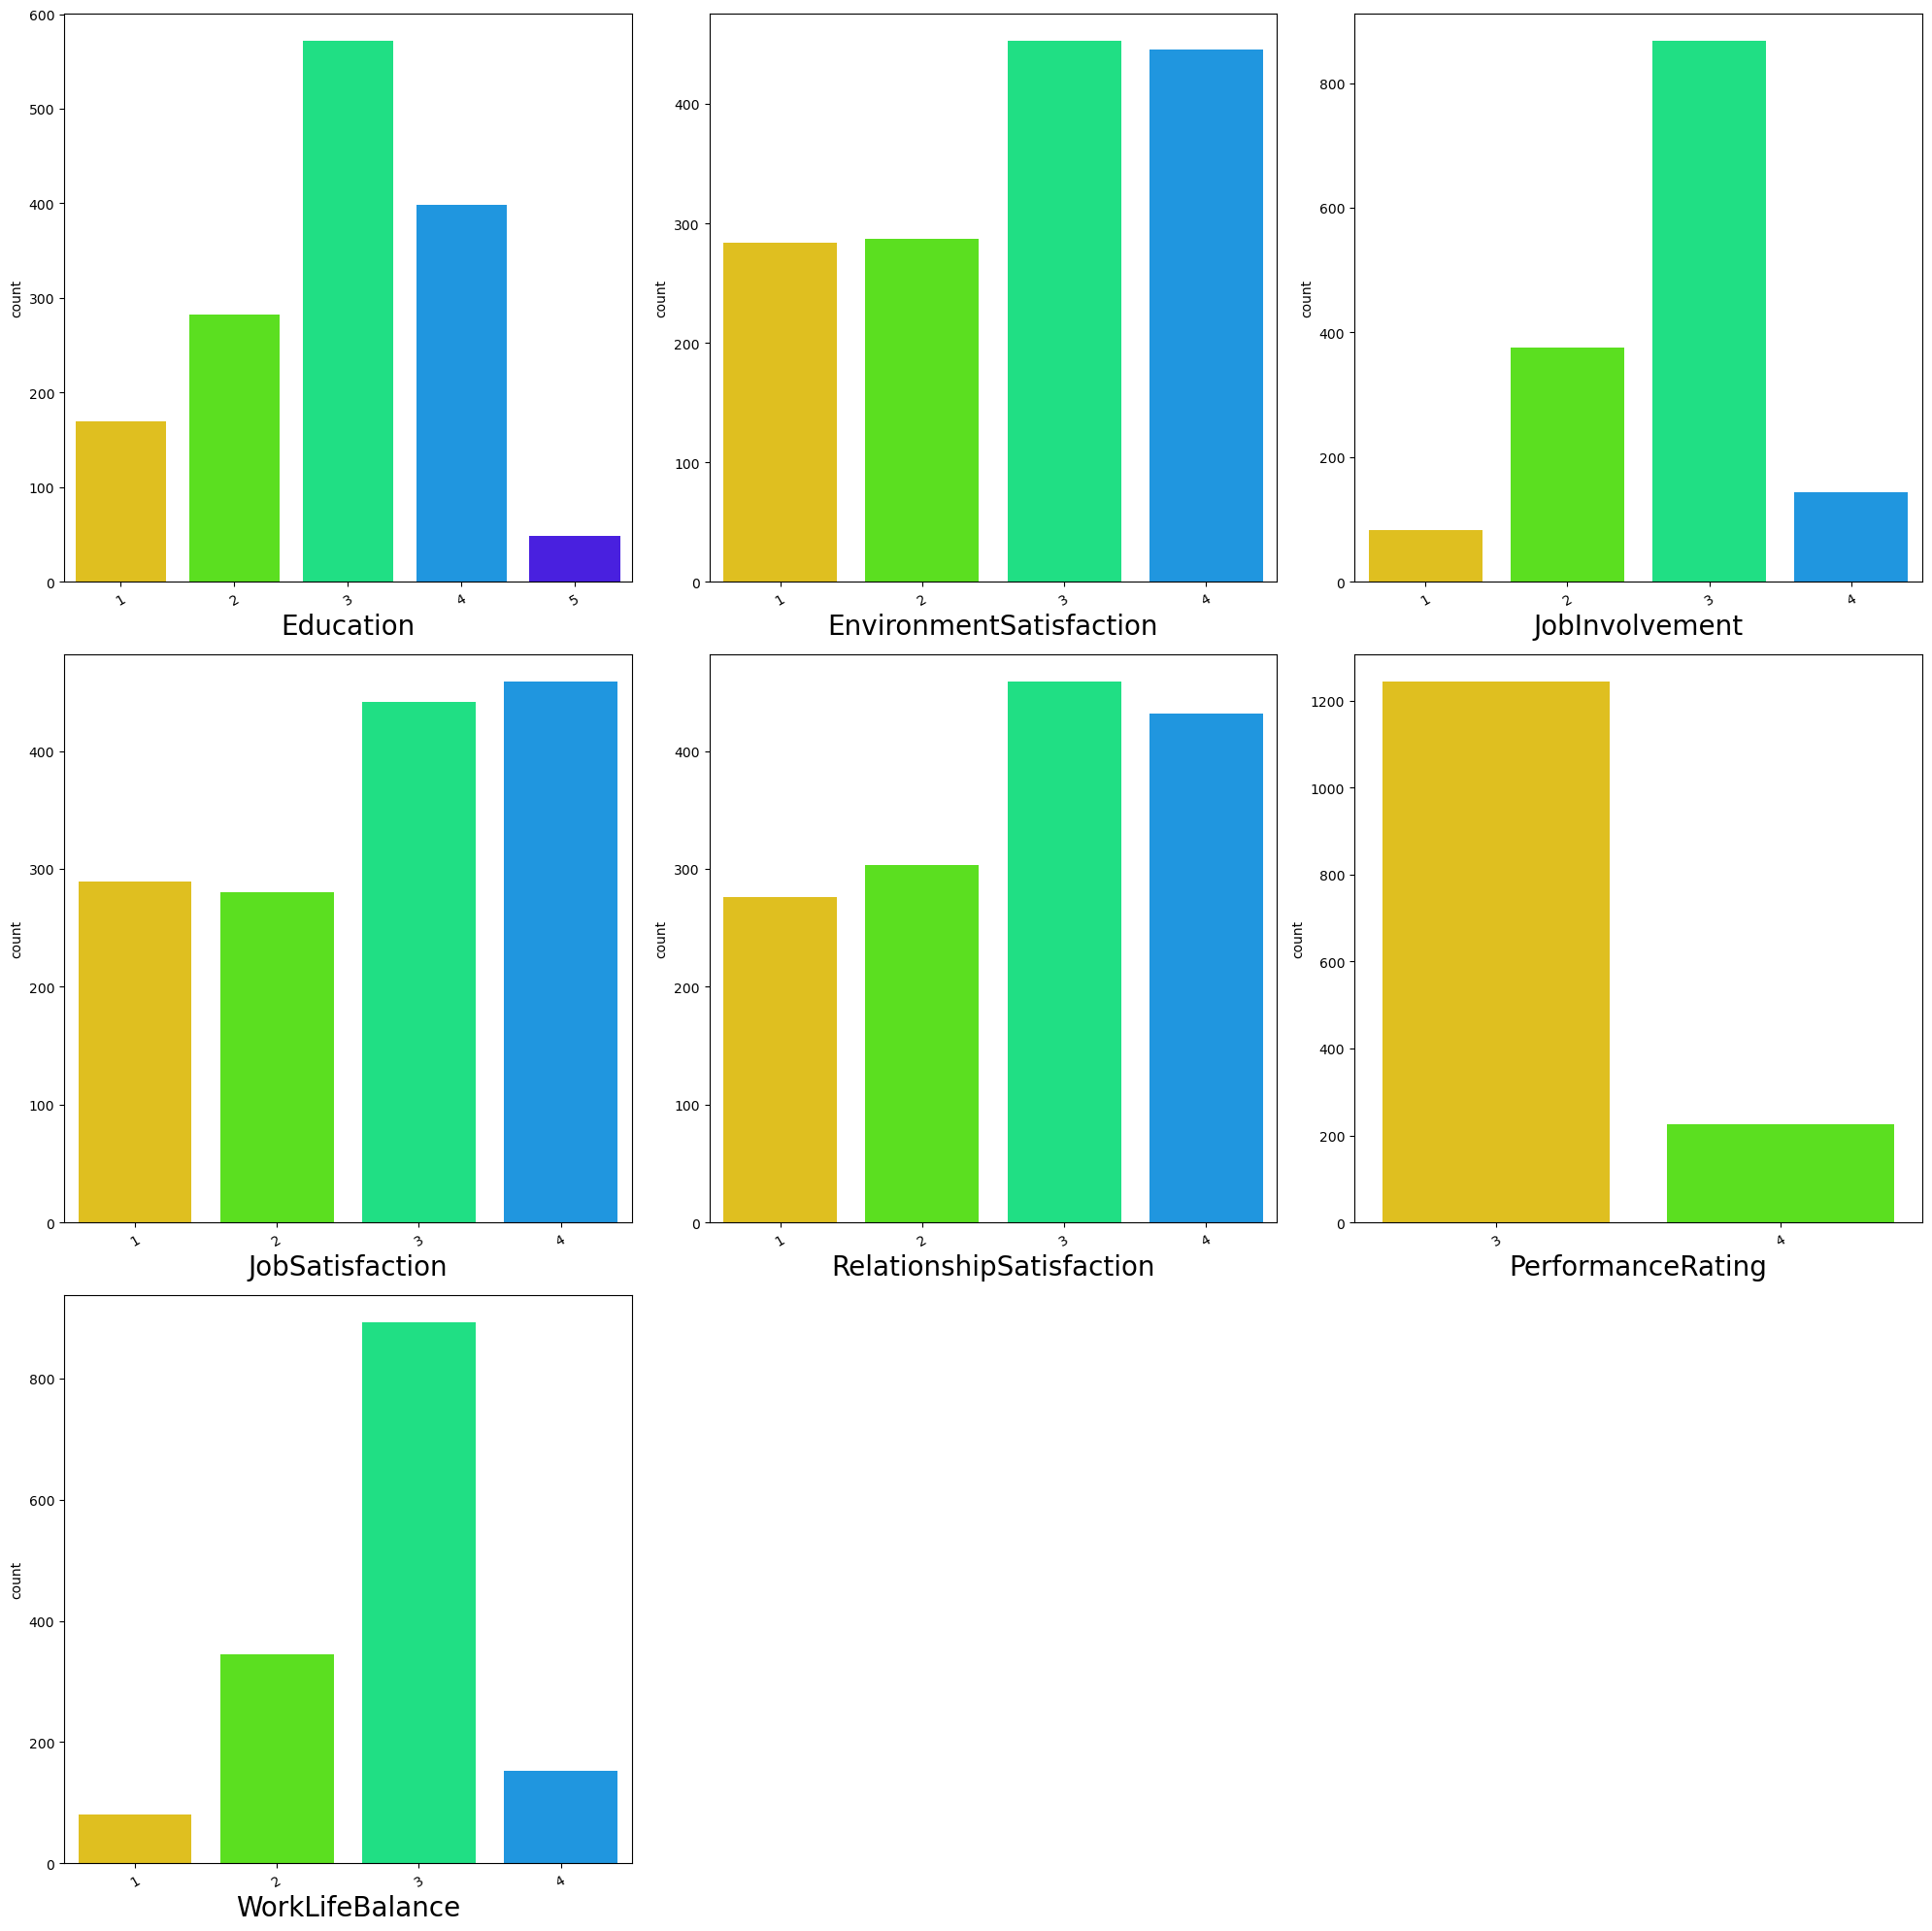

In [17]:
sns.set_palette('hsv')
plt.figure(figsize=(20, 20), facecolor='white')
plotnumber = 1
Ordinal = ['Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
           'RelationshipSatisfaction', 'PerformanceRating', 'WorkLifeBalance']

for i in Ordinal:
    if plotnumber <= 9:
        ax = plt.subplot(3, 3, plotnumber)
        sns.countplot(data=df, x=i)
        plt.xlabel(i, fontsize=20)
        plt.xticks(rotation=30)
    plotnumber += 1

plt.tight_layout()
plt.show()

## Education level of Man power available

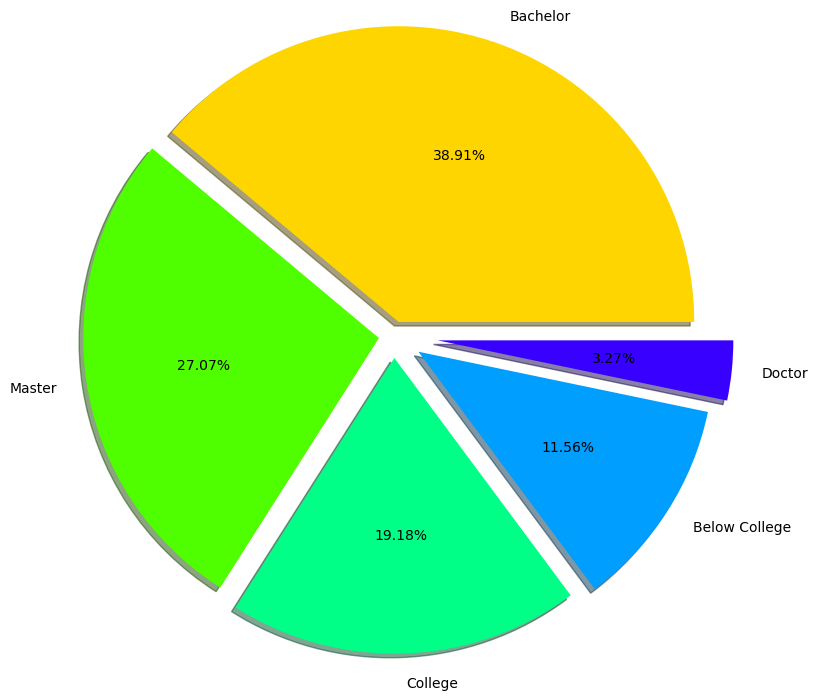

In [18]:
labels='Bachelor','Master','College','Below College','Doctor'
fig, ax = plt.subplots()
ax.pie(df['Education'].value_counts(),labels = labels,radius =2,autopct = '%3.2f%%',explode=[0.1,0.1,0.15,0.2,0.3], shadow=True,)
plt.show()

More than 60 % employees educated at Masters & Bachelor. It interesting to find out in which department need this human resources.

30 % of Employees are highly educated which involves master and doctor degree.

39 % of Employees are graduate.

Almost 19% Employees are educated upto college & 12% are below college.

In [19]:
df['Department'].value_counts()

Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64

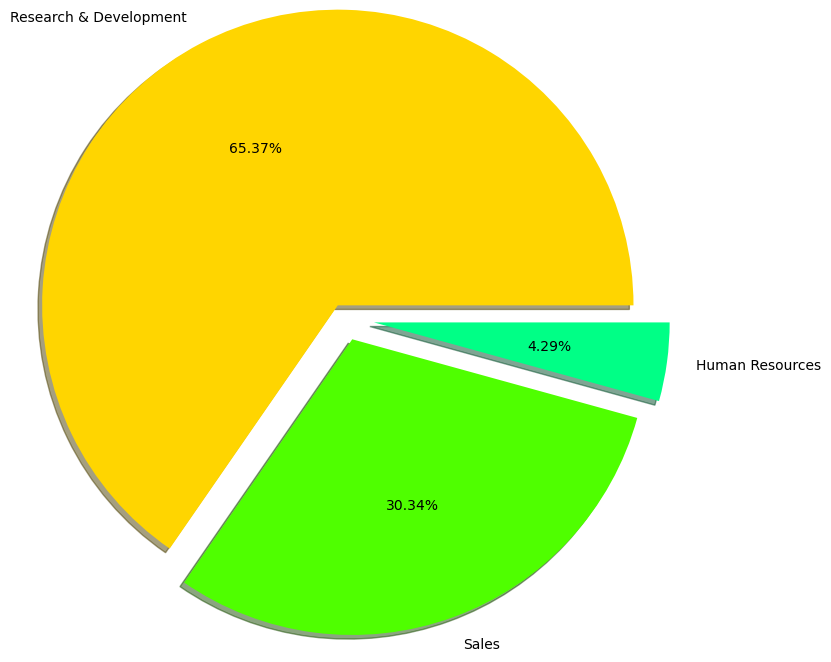

In [20]:
labels ='Research & Development','Sales','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['Department'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.15,0.2],shadow=True)
plt.show()

In [21]:
pd.crosstab([df.Education],[df.Department], margins=True).style.background_gradient(cmap='summer_r')


Department,Human Resources,Research & Development,Sales,All
Education,,,,
1,5,115,50,170
2,13,182,87,282
3,27,379,166,572
4,15,255,128,398
5,3,30,15,48
All,63,961,446,1470


In [22]:
pd.crosstab([df.Education],[df.Department,df.Attrition], margins=True).style.background_gradient(cmap='summer_r')


## Employee distribution as per education field and level of education

In [23]:
df['EducationField'].value_counts()

Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64

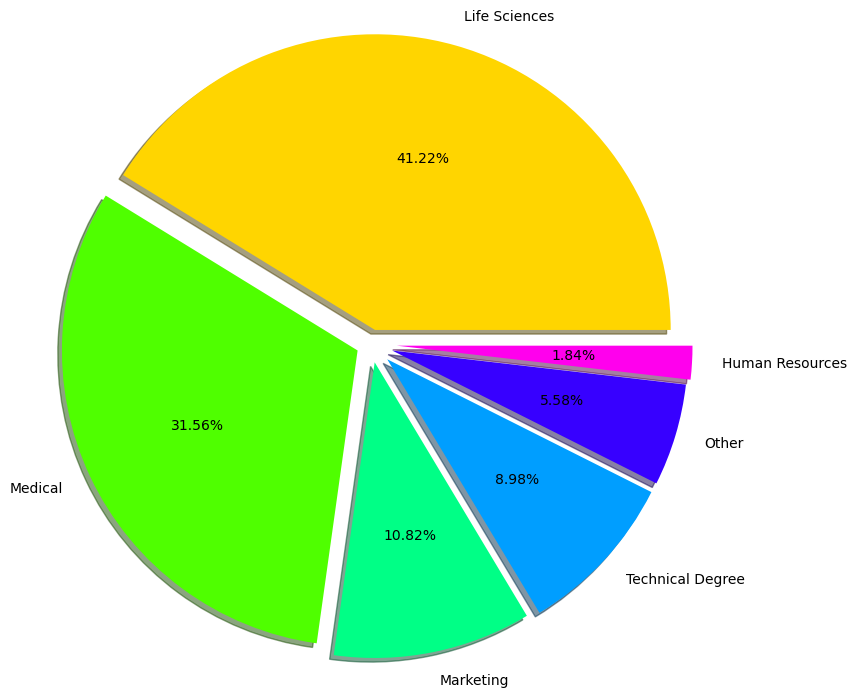

In [24]:
labels ='Life Sciences','Medical','Marketing','Technical Degree','Other','Human Resources'
fig,ax= plt.subplots()
ax.pie(df['EducationField'].value_counts(),labels=labels, radius=2,autopct= '%3.2f%%',explode=[0.1,0.1,0.125,0.15,0.15,0.175],shadow=True)
plt.show()

In [25]:
# Let check distribution of education Vs education Field
pd.crosstab([df.Education],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')

EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Education,,,,,,,
1,2,67,14,63,5,19,170
2,2,116,24,99,19,22,282
3,16,233,59,183,24,57,572
4,5,173,52,104,33,31,398
5,2,17,10,15,1,3,48
All,27,606,159,464,82,132,1470


In [26]:
# Let check distribution of department Vs education Field
pd.crosstab([df.Department],[df.EducationField], margins=True).style.background_gradient(cmap='summer_r')


EducationField,Human Resources,Life Sciences,Marketing,Medical,Other,Technical Degree,All
Department,,,,,,,
Human Resources,27,16,0,13,3,4,63
Research & Development,0,440,0,363,64,94,961
Sales,0,150,159,88,15,34,446
All,27,606,159,464,82,132,1470


# Lets work with Job Role

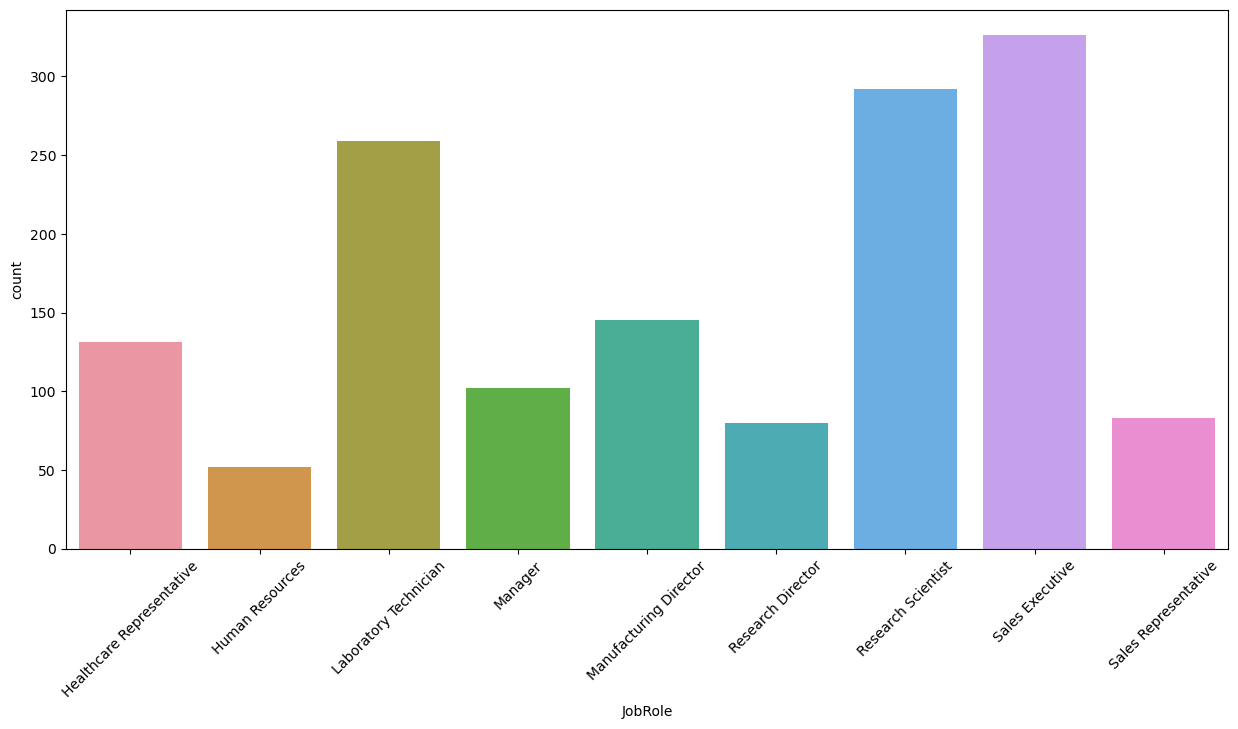

In [27]:
df['JobRole'] = df['JobRole'].astype('category')

sns.set_palette('hsv')
plt.figure(figsize=(15, 7))
sns.countplot(data=df, x='JobRole')
plt.xticks(rotation=45)
plt.show()

In [28]:
pd.crosstab([df.JobRole],[df.Department], margins=True).style.background_gradient(cmap='gist_rainbow_r')


Department,Human Resources,Research & Development,Sales,All
JobRole,,,,
Healthcare Representative,0,131,0,131
Human Resources,52,0,0,52
Laboratory Technician,0,259,0,259
Manager,11,54,37,102
Manufacturing Director,0,145,0,145
Research Director,0,80,0,80
Research Scientist,0,292,0,292
Sales Executive,0,0,326,326
Sales Representative,0,0,83,83


<Figure size 1200x1000 with 0 Axes>

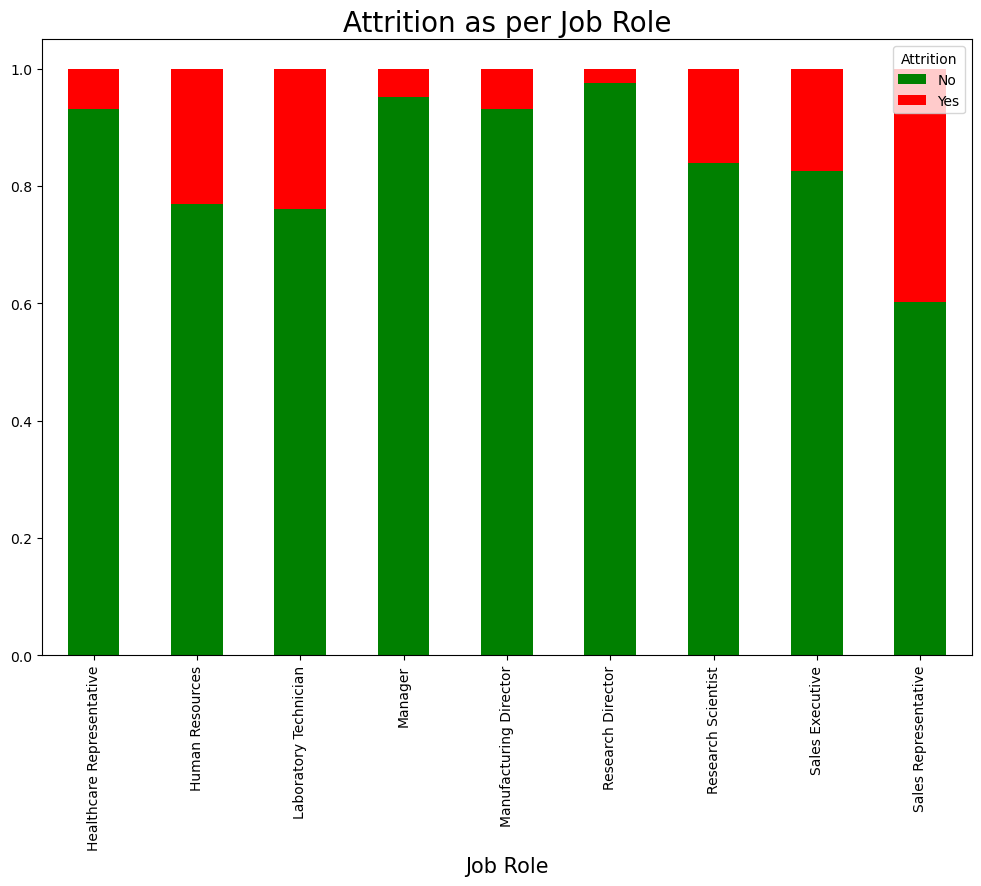

In [29]:
plt.figure(figsize=(12,10))
data=pd.crosstab(df['JobRole'], df['Attrition'])
data.div(data.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True, 
                    color=['green', 'red'],figsize=(12,8))
plt.title('Attrition as per Job Role', fontsize=20)
plt.xlabel('Job Role',fontsize=15)
plt.show()

In [30]:
pd.crosstab([df.JobRole,df.Department],[df.Attrition], margins=True).style.background_gradient(cmap='gist_rainbow_r')


In [31]:
# Grouping Numeric Features
Numeric=['Age', 'DailyRate', 'DistanceFromHome',  
 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 
 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 
 'RelationshipSatisfaction','StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

## Violinplot of Numeric Variables

In [32]:
# Grouping Numeric Features
Numeric_int=['Age', 'DailyRate', 'DistanceFromHome', 'HourlyRate','MonthlyIncome', 'MonthlyRate', 
             'NumCompaniesWorked', 'PercentSalaryHike', 'TotalWorkingYears','TrainingTimesLastYear',
             'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

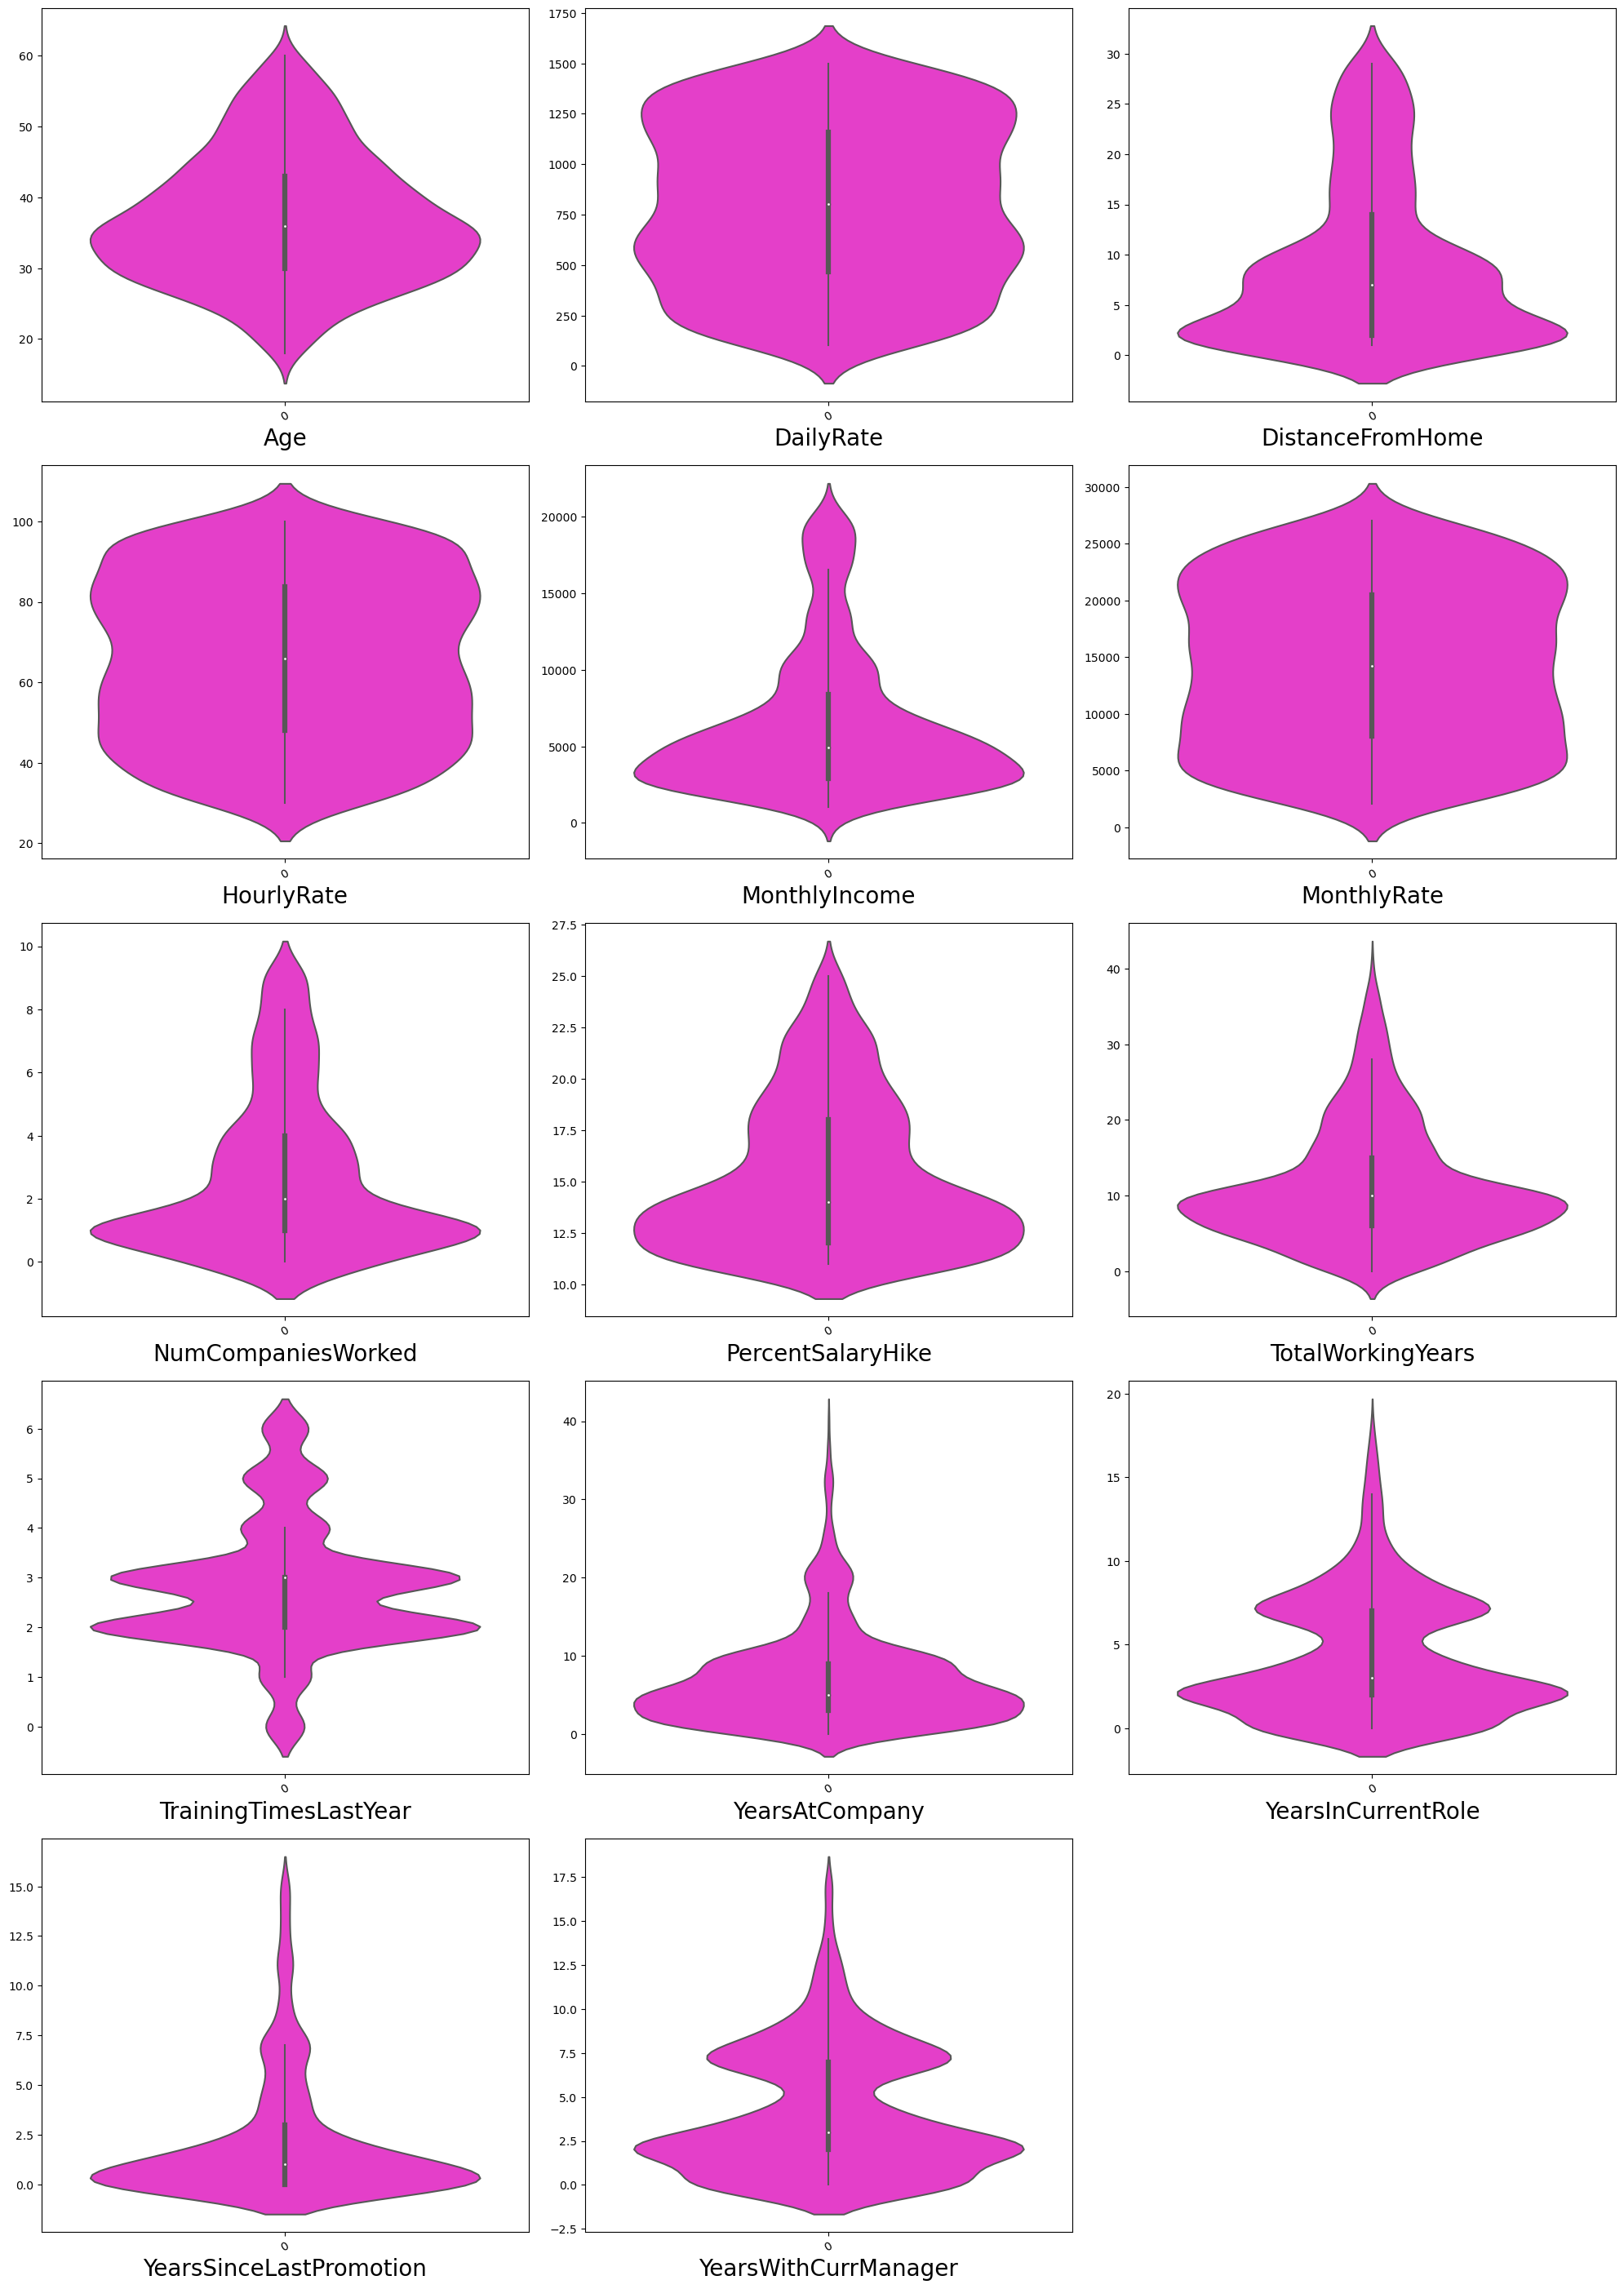

In [33]:
sns.set_palette('spring')
plt.figure(figsize=(20,50), facecolor='white')
plotnumber =1

for i in Numeric_int:
    if plotnumber <=25:
        ax = plt.subplot(9,3,plotnumber)
        sns.violinplot(df[i])
        plt.xlabel(i,fontsize=20)
        plt.xticks(rotation=30)
    plotnumber+=1
plt.tight_layout()
plt.show()

## Age Vs Attrition

<Axes: ylabel='count'>

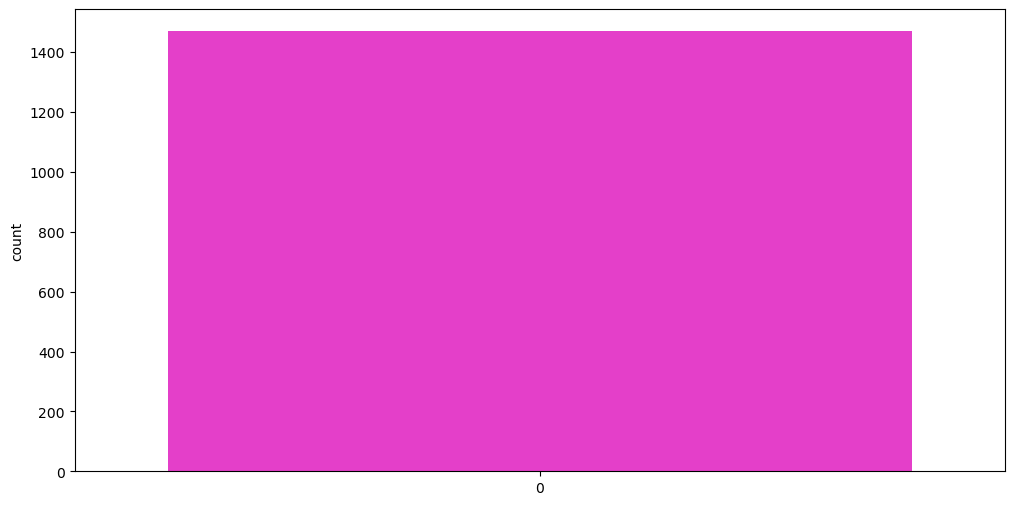

In [34]:
plt.subplots(figsize=(12,6))
sns.countplot(df['Age'])

<Axes: xlabel='Age', ylabel='count'>

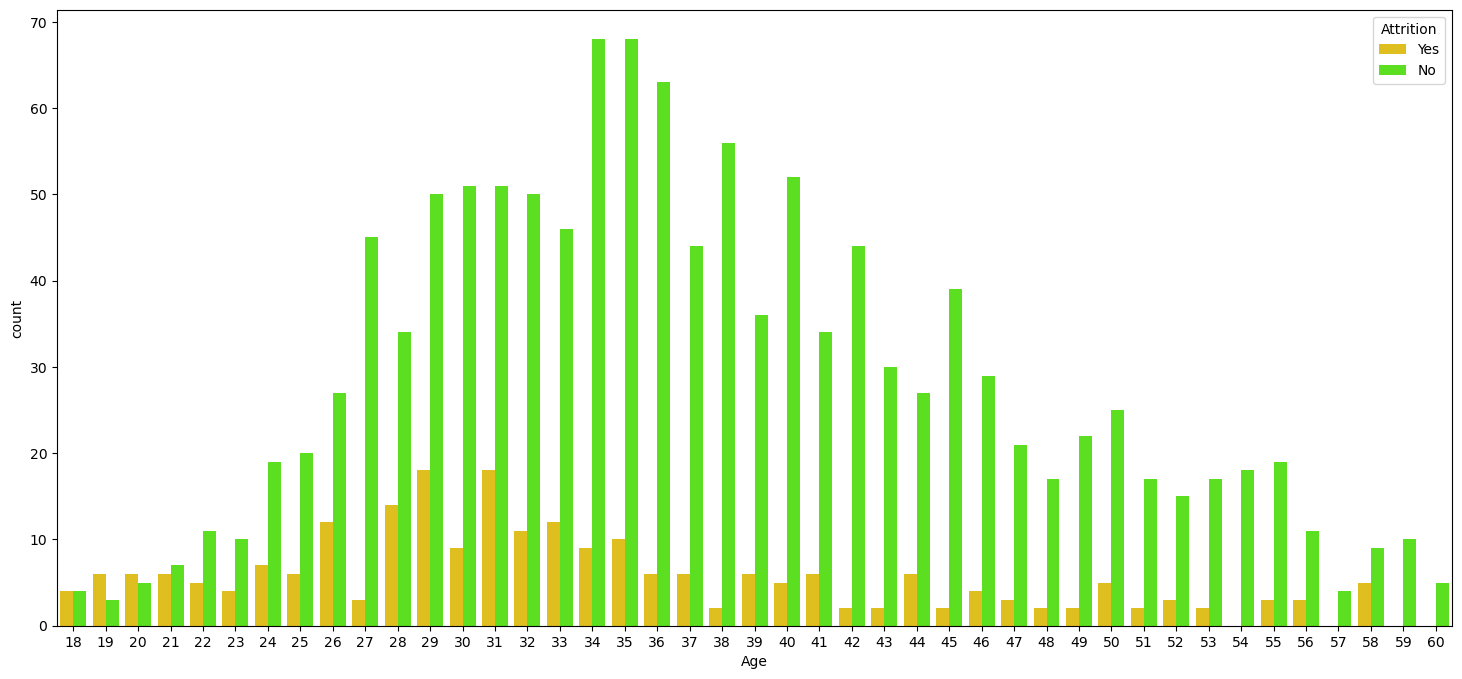

In [35]:
sns.set_palette('hsv')
plt.subplots(figsize=(18,8))
sns.countplot(x='Age', hue='Attrition', data=df)

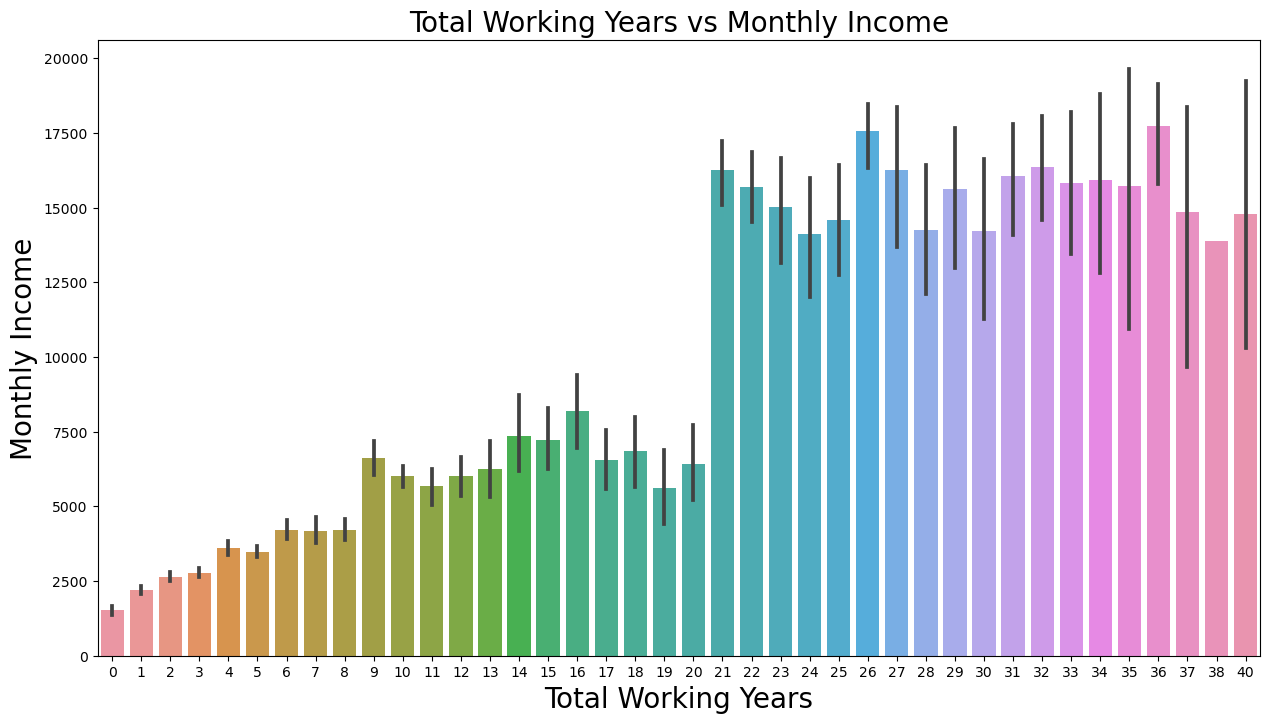

In [36]:
plt.figure(figsize=(15, 8))
sns.barplot(data=df, x='TotalWorkingYears', y='MonthlyIncome')
plt.xlabel('Total Working Years', fontsize=20)
plt.ylabel('Monthly Income', fontsize=20)
plt.title("Total Working Years vs Monthly Income", fontsize=20)
plt.show()

Comment:
Monthly Income is highest for the employees with 21 or more number of Total Working Years.

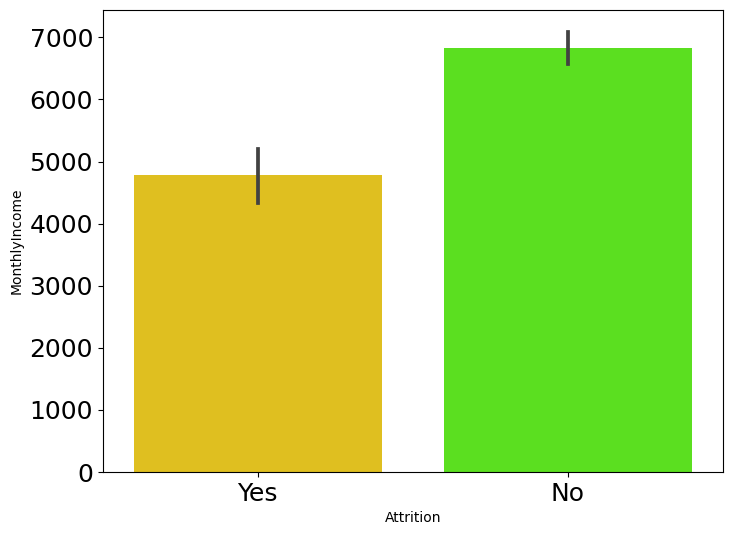

In [37]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='MonthlyIncome',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

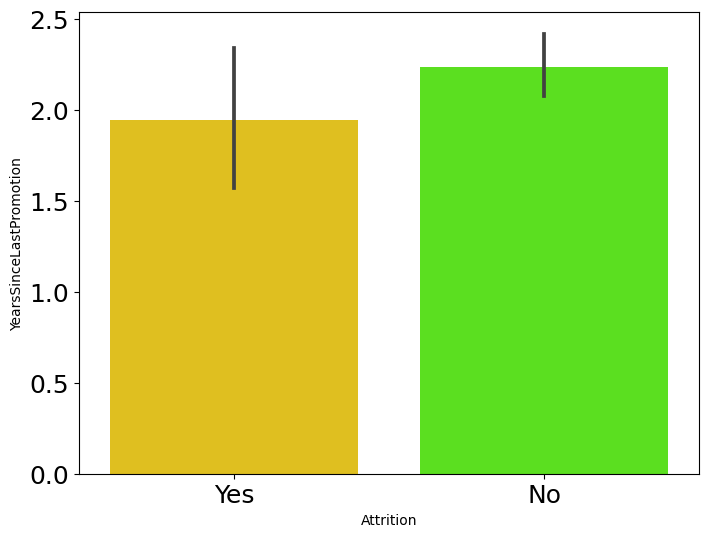

In [38]:
plt.figure(figsize=(8,6))
sns.barplot(x='Attrition',y='YearsSinceLastPromotion',data=df)
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)
plt.show()

Encoding categorical data

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df["Attrition"] = le.fit_transform(df["Attrition"])
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,0,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,1,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,0,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,0,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [40]:
df.drop(["EmployeeCount", "EmployeeNumber", "Over18", "StandardHours"], axis=1, inplace=True)


In [41]:
df.shape

(1470, 31)

In [42]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()
def ordinal_encode(df, column):
    df[column] = oe.fit_transform(df[column])
    return df

oe_col = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'OverTime']
df=ordinal_encode(df, oe_col)
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2.0,1102,2.0,1,2,1.0,2,0.0,94,3,2,7.0,4,2.0,5993,19479,8,1.0,11,3,1,0,8,0,1,6,4,0,5
1,49,0,1.0,279,1.0,8,1,1.0,3,1.0,61,2,2,6.0,2,1.0,5130,24907,1,0.0,23,4,4,1,10,3,3,10,7,1,7
2,37,1,2.0,1373,1.0,2,2,4.0,4,1.0,92,2,1,2.0,3,2.0,2090,2396,6,1.0,15,3,2,0,7,3,3,0,0,0,0
3,33,0,1.0,1392,1.0,3,4,1.0,4,0.0,56,3,1,6.0,3,1.0,2909,23159,1,1.0,11,3,3,0,8,3,3,8,7,3,0
4,27,0,2.0,591,1.0,2,1,3.0,1,1.0,40,3,1,2.0,2,1.0,3468,16632,9,0.0,12,3,4,1,6,3,3,2,2,2,2


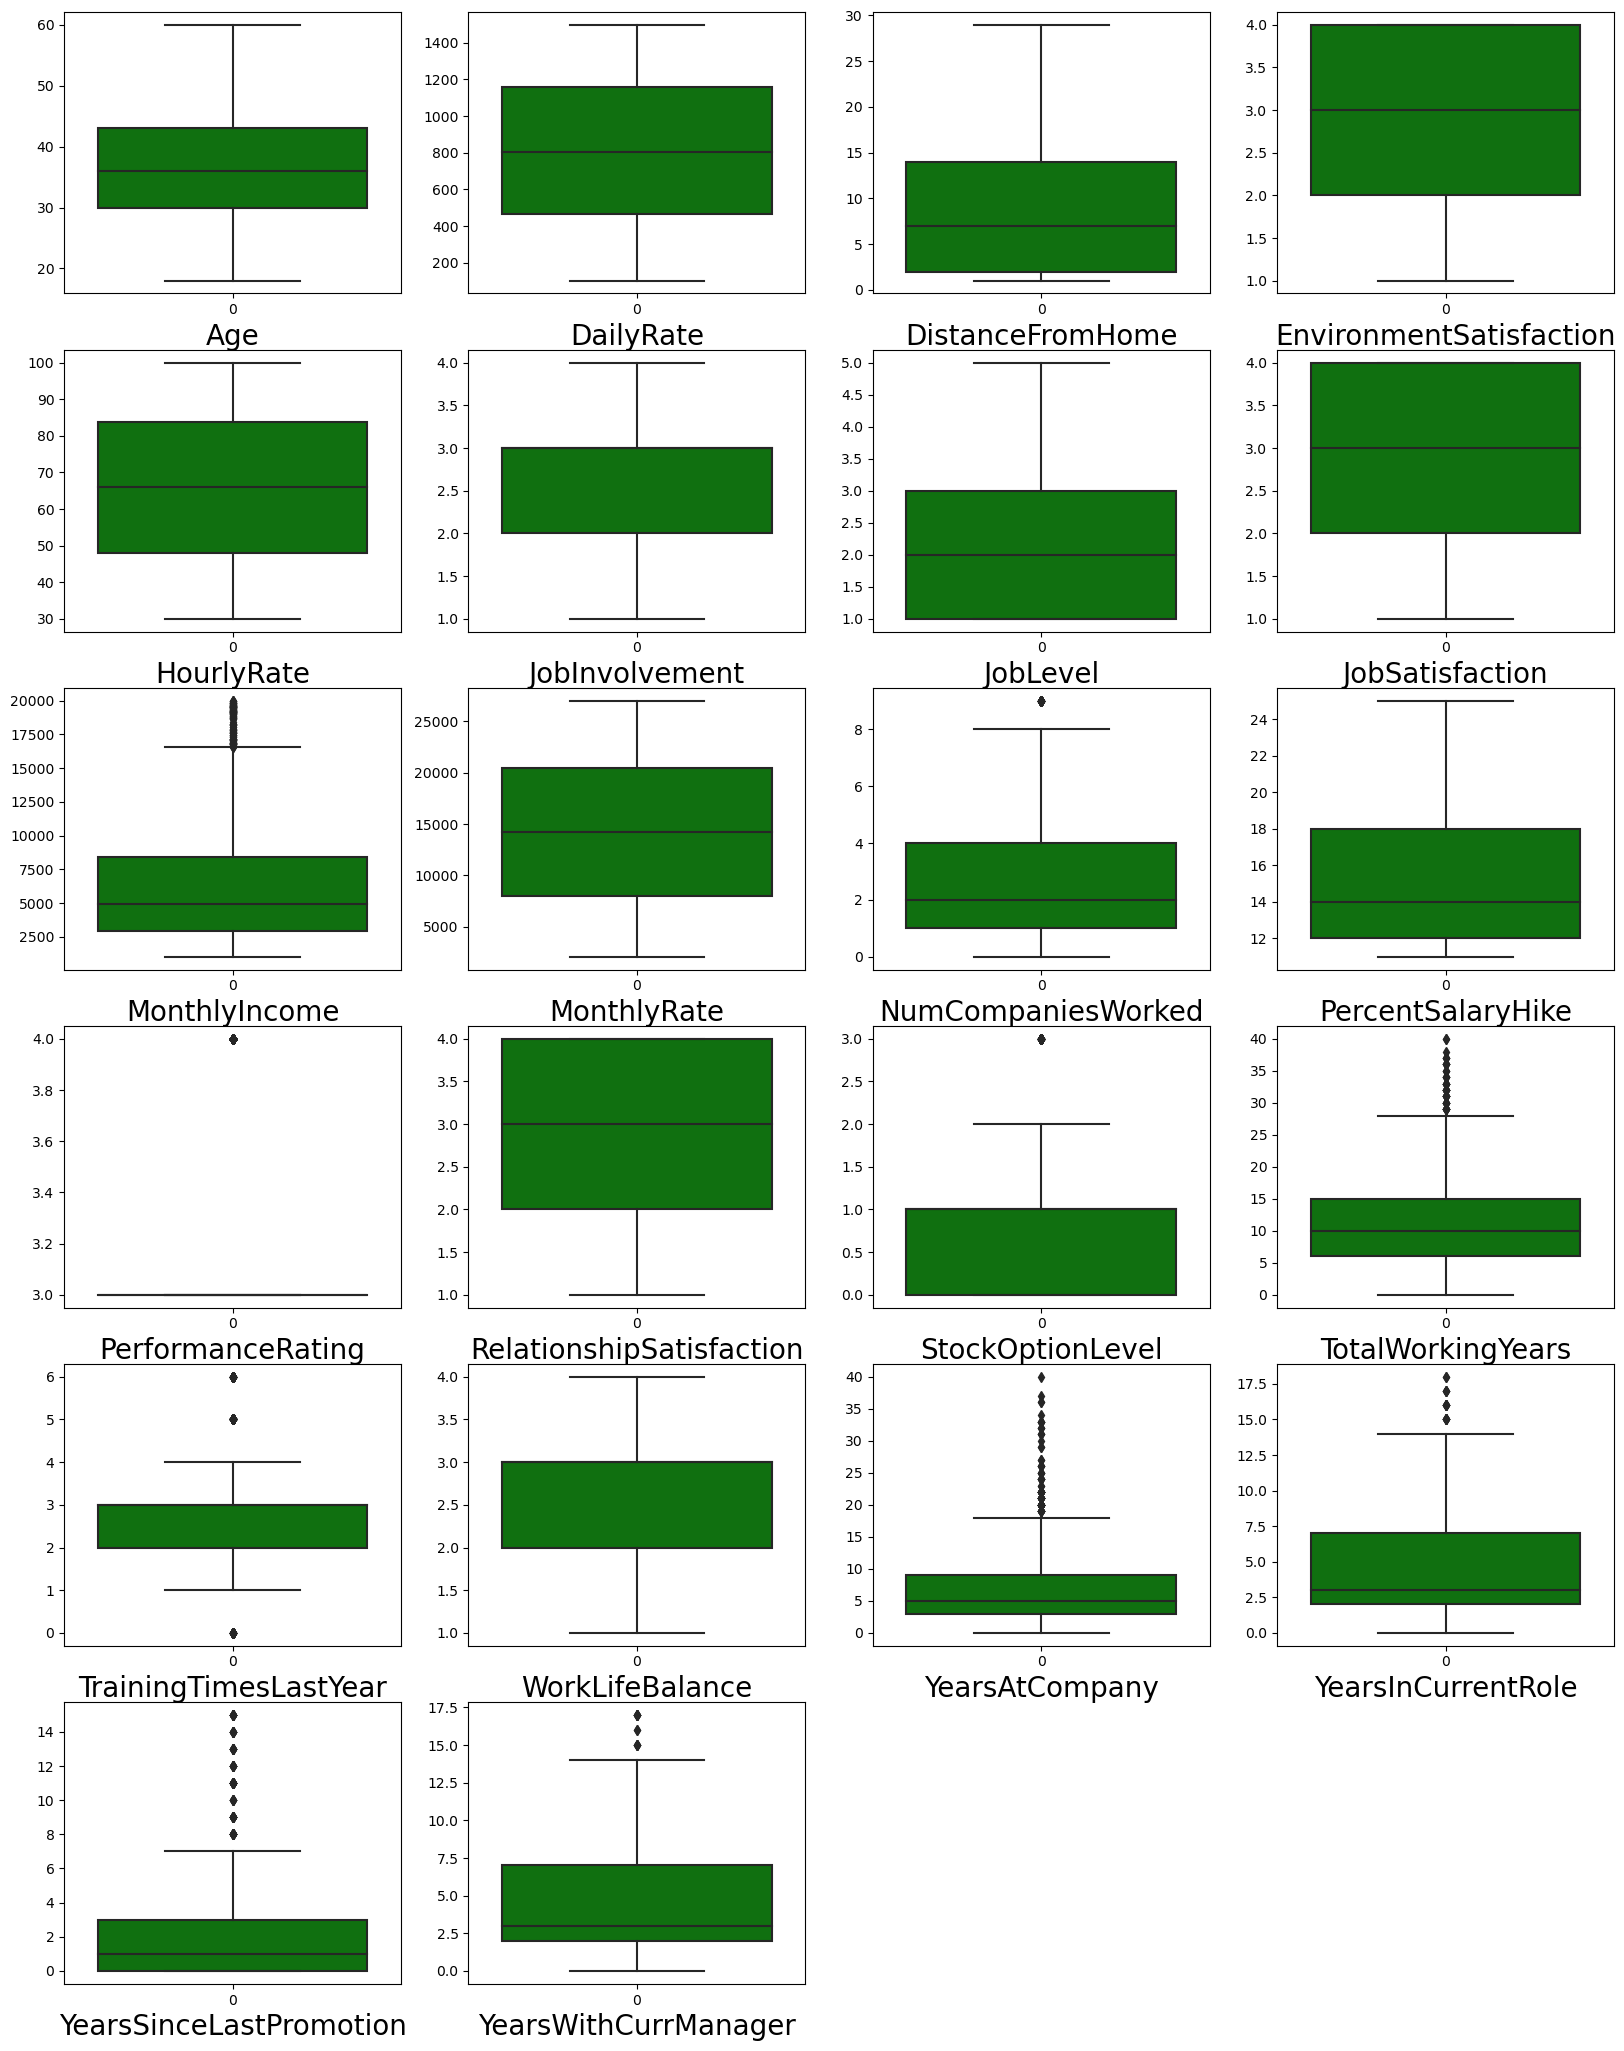

In [43]:
plt.figure(figsize=(20,30),facecolor='white')
plotnumber=1

for column in Numeric:
    if plotnumber<=28:
        ax=plt.subplot(7,4,plotnumber)
        sns.boxplot(df[column],color='g')
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

In [44]:
from scipy.stats import zscore
z = np.abs(zscore(df))
threshold = 3
df1 = df[(z<3).all(axis = 1)]

print ("Shape of the dataframe before removing outliers: ", df.shape)
print ("Shape of the dataframe after removing outliers: ", df1.shape)
print ("Percentage of data loss post outlier removal: ", (df.shape[0]-df1.shape[0])/df.shape[0]*100)


Shape of the dataframe before removing outliers:  (1470, 31)
Shape of the dataframe after removing outliers:  (1387, 31)
Percentage of data loss post outlier removal:  5.646258503401361


In [45]:
print("\033[1m"+'Percentage Data Loss :'+"\033[0m",((1470-1387)/1470)*100,'%')

Percentage Data Loss : 5.646258503401361 %


## Feature selection and Engineering

In [46]:
df.skew()

Age                         0.413286
Attrition                   1.844366
BusinessTravel             -1.439006
DailyRate                  -0.003519
Department                  0.172231
DistanceFromHome            0.958118
Education                  -0.289681
EducationField              0.550371
EnvironmentSatisfaction    -0.321654
Gender                     -0.408665
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobRole                    -0.357270
JobSatisfaction            -0.329672
MaritalStatus              -0.152175
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
OverTime                    0.964489
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
Y

In [47]:
X = df.drop(['Attrition'], axis =1)
Y = df['Attrition']

In [48]:
import pandas as pd
from sklearn.preprocessing import power_transform

x = df.values 
df_transformed = power_transform(x)
df_transformed = pd.DataFrame(df_transformed, columns=df.columns)
print(df_transformed.skew())

Age                        -0.007603
Attrition                   1.844366
BusinessTravel             -0.970506
DailyRate                  -0.196160
Department                  0.013801
DistanceFromHome           -0.007468
Education                  -0.099881
EducationField             -0.008386
EnvironmentSatisfaction    -0.205395
Gender                     -0.408665
HourlyRate                 -0.106461
JobInvolvement             -0.020365
JobLevel                    0.103624
JobRole                    -0.319659
JobSatisfaction            -0.212815
MaritalStatus              -0.156911
MonthlyIncome               0.032831
MonthlyRate                -0.184087
NumCompaniesWorked          0.014814
OverTime                    0.964489
PercentSalaryHike           0.116250
PerformanceRating           0.000000
RelationshipSatisfaction   -0.193634
StockOptionLevel            0.087019
TotalWorkingYears          -0.010653
TrainingTimesLastYear       0.058058
WorkLifeBalance            -0.012286
Y

In [49]:
df.corr()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,-0.159205,0.024751,0.010661,-0.031882,-0.001686,0.208034,-0.040873,0.010146,-0.036311,0.024287,0.029820,0.509604,-0.122427,-0.004892,-0.095029,0.497855,0.028051,0.299635,0.028062,0.003634,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
Attrition,-0.159205,1.000000,0.000074,-0.056652,0.063991,0.077924,-0.031373,0.026846,-0.103369,0.029453,-0.006846,-0.130016,-0.169105,0.067151,-0.103481,0.162070,-0.159840,0.015170,0.043494,0.246118,-0.013478,0.002889,-0.045872,-0.137145,-0.171063,-0.059478,-0.063939,-0.134392,-0.160545,-0.033019,-0.156199
BusinessTravel,0.024751,0.000074,1.000000,-0.004086,-0.009044,-0.024469,0.000757,0.023724,0.004174,-0.032981,0.026528,0.039062,0.019311,0.002724,-0.033962,0.024001,0.034319,-0.014107,0.020875,0.016543,-0.029377,-0.026341,-0.035986,-0.016727,0.034226,0.015240,-0.011256,-0.014575,-0.011497,-0.032591,-0.022636
DailyRate,0.010661,-0.056652,-0.004086,1.000000,0.007109,-0.004985,-0.016806,0.037709,0.018355,-0.011716,0.023381,0.046135,0.002966,-0.009472,0.030571,-0.069586,0.007707,-0.032182,0.038153,0.009135,0.022704,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
Department,-0.031882,0.063991,-0.009044,0.007109,1.000000,0.017225,0.007996,0.013720,-0.019395,-0.041583,-0.004144,-0.024586,0.101963,0.662431,0.021001,0.056073,0.053130,0.023642,-0.035882,0.007481,-0.007840,-0.024604,-0.022414,-0.012193,-0.015762,0.036875,0.026383,0.022920,0.056315,0.040061,0.034282
DistanceFromHome,-0.001686,0.077924,-0.024469,-0.004985,0.017225,1.000000,0.021042,0.002013,-0.016075,-0.001851,0.031131,0.008783,0.005303,-0.001015,-0.003669,-0.014437,-0.017014,0.027473,-0.029251,0.025514,0.040235,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.031373,0.000757,-0.016806,0.007996,0.021042,1.000000,-0.039592,-0.027128,-0.016547,0.016775,0.042438,0.101589,0.004236,-0.011296,0.004053,0.094961,-0.026084,0.126317,-0.020322,-0.011111,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EducationField,-0.040873,0.026846,0.023724,0.037709,0.013720,0.002013,-0.039592,1.000000,0.043163,-0.002504,-0.021941,-0.002655,-0.044933,0.015599,-0.034401,0.014420,-0.041070,-0.027182,-0.008663,0.002259,-0.011214,-0.005614,-0.004378,-0.016185,-0.027848,0.049195,0.041191,-0.018692,-0.010506,0.002326,-0.004130
EnvironmentSatisfaction,0.010146,-0.103369,0.004174,0.018355,-0.019395,-0.016075,-0.027128,0.043163,1.000000,0.000508,-0.049857,-0.008278,0.001212,-0.017321,-0.006784,-0.003593,-0.006259,0.037600,0.012594,0.070132,-0.031701,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
Gender,-0.036311,0.029453,-0.032981,-0.011716,-0.041583,-0.001851,-0.016547,-0.002504,0.000508,1.000000,-0.000478,0.017960,-0.039403,-0.039723,0.033252,-0.047183,-0.031858,-0.041482,-0.039147,-0.041924,0.002733,-0.013859,0.022868,0.012716,-0.046881,-0.038787,-0.002753,-0.029747,-0.041483,-0.026985,-0.030599


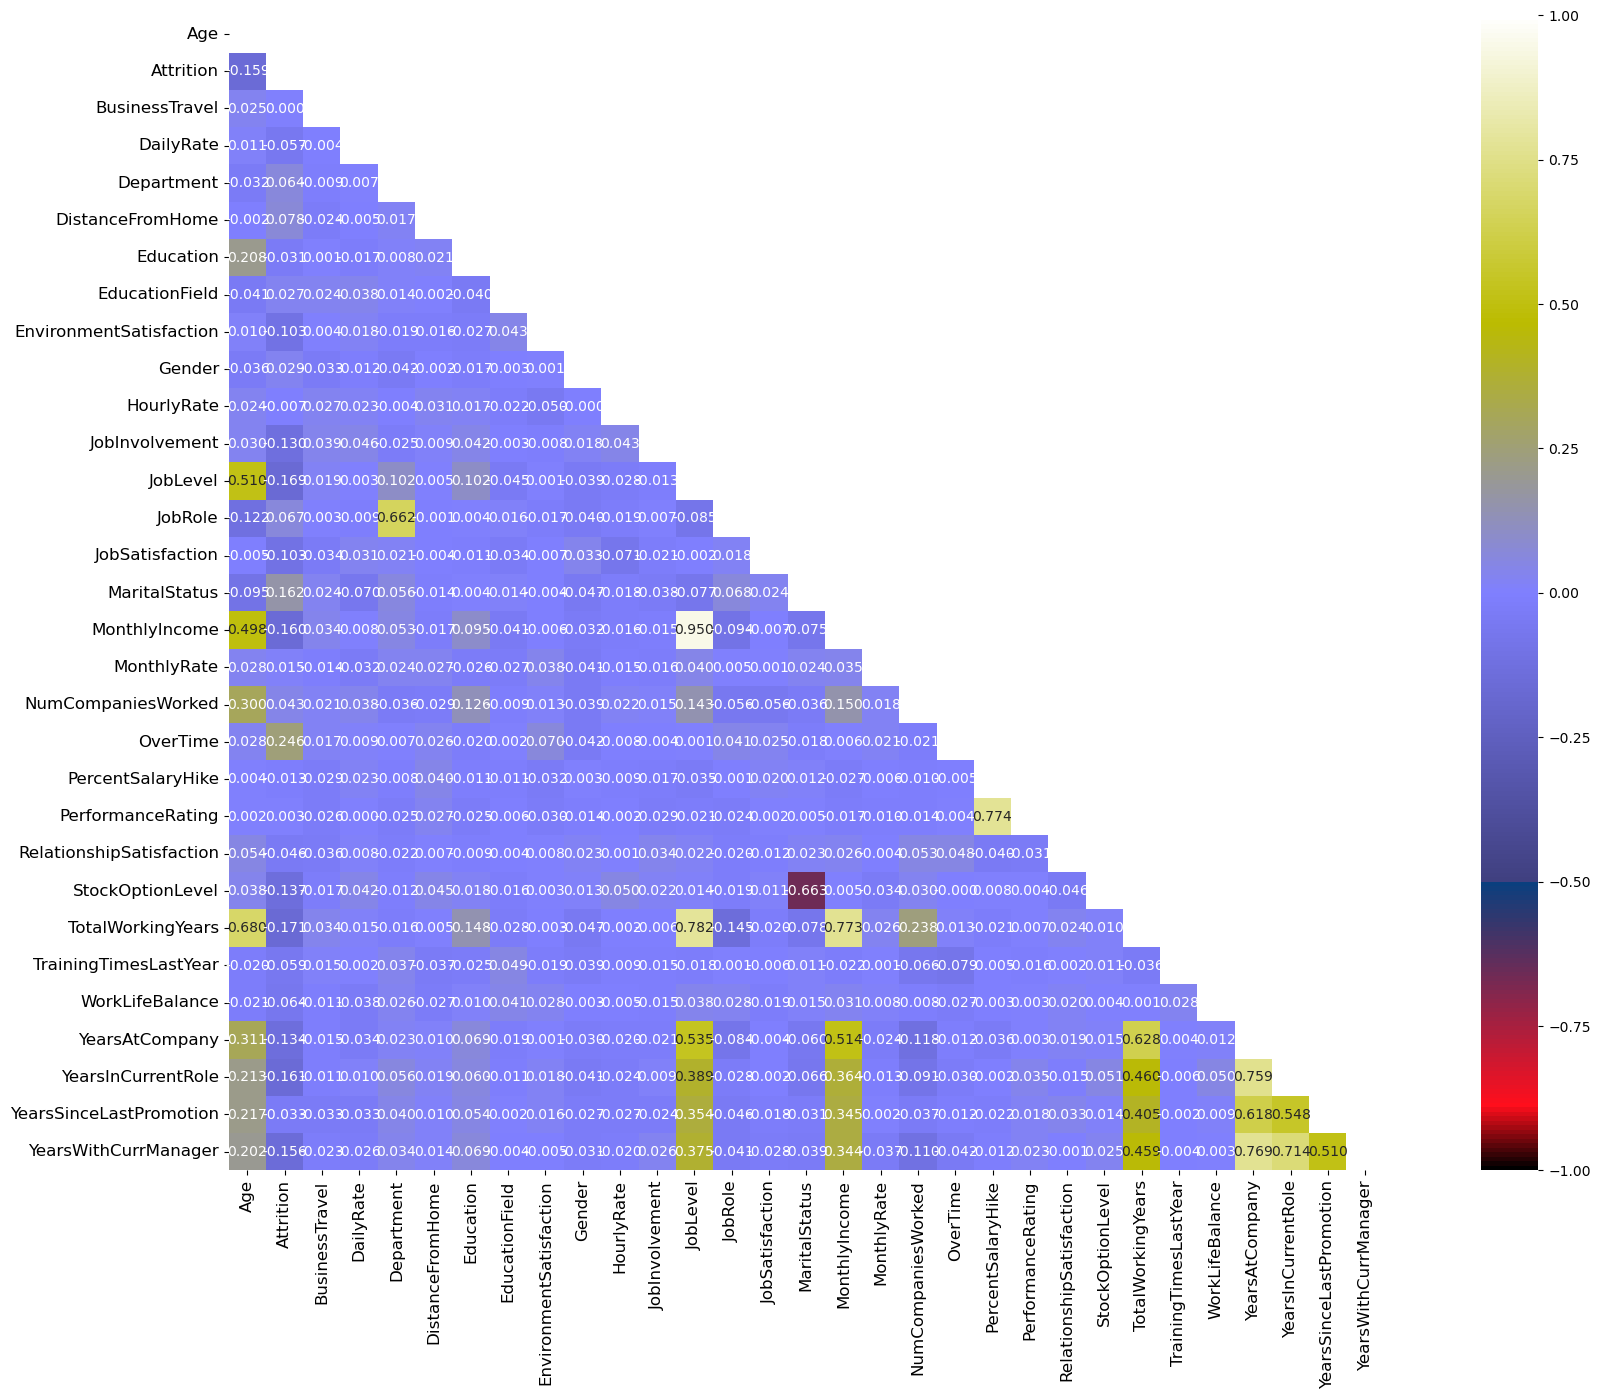

In [50]:
upper_triangle = np.triu(df.corr())
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, square=True, fmt='0.3f', 
            annot_kws={'size':10}, cmap="gist_stern", mask=upper_triangle)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

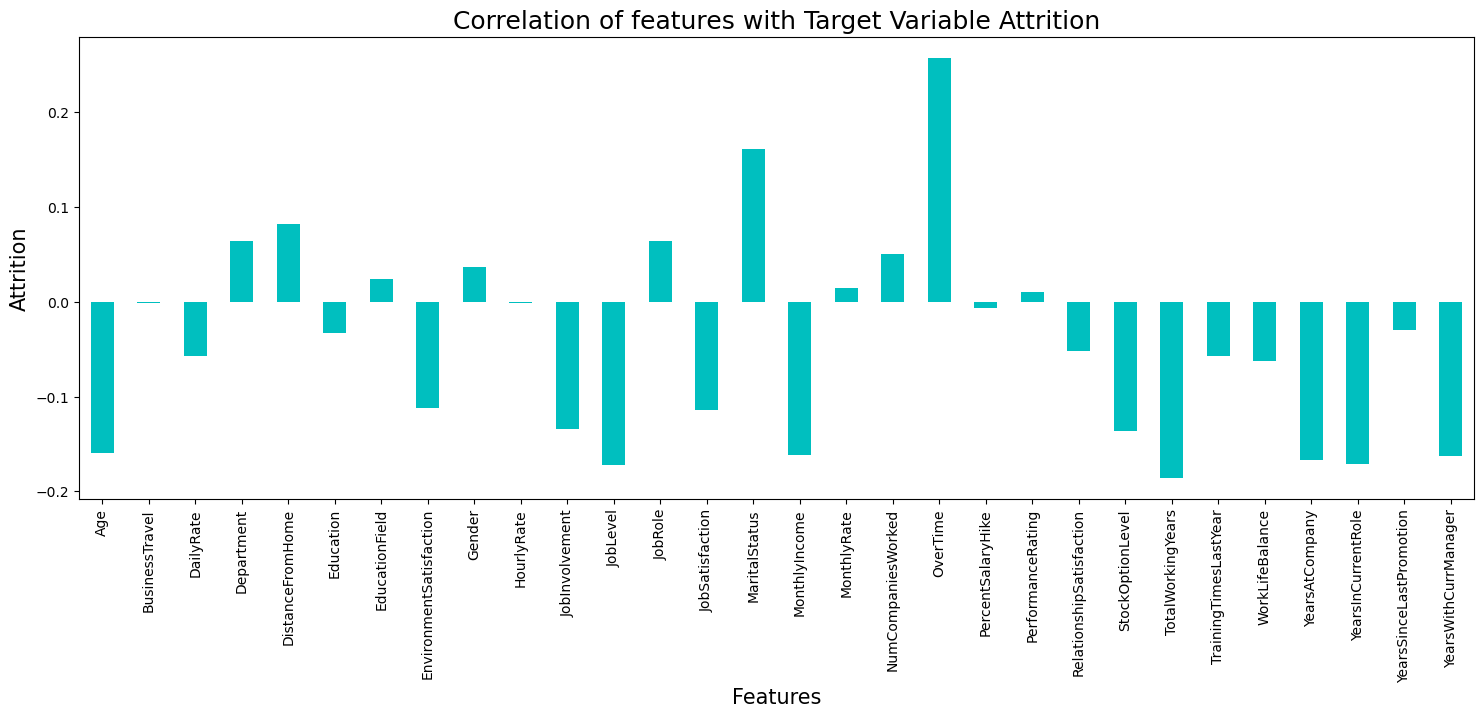

In [51]:
plt.figure(figsize = (18,6))
df1.corr()['Attrition'].drop(['Attrition']).plot(kind='bar',color = 'c')
plt.xlabel('Features',fontsize=15)
plt.ylabel('Attrition',fontsize=15)
plt.title('Correlation of features with Target Variable Attrition',fontsize = 18)
plt.show()

In [52]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif= pd.DataFrame()
vif['VIF']= [variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
vif['Features']= df.columns
vif

,VIF,Features
0,33.357814,Age
1,1.487236,Attrition
2,6.749035,BusinessTravel
3,4.975791,DailyRate
4,13.044796,Department
5,2.337540,DistanceFromHome
6,9.457866,Education
7,3.872341,EducationField
8,7.198129,EnvironmentSatisfaction
9,2.518932,Gender


In [53]:
from imblearn.over_sampling import SMOTE

In [54]:
oversample = SMOTE()
X, Y = oversample.fit_resample(X, Y)

In [55]:
Y.value_counts()

1    1233
0    1233
Name: Attrition, dtype: int64

In [56]:
from sklearn.preprocessing import StandardScaler
scaler= StandardScaler()
X_scale = scaler.fit_transform(X)

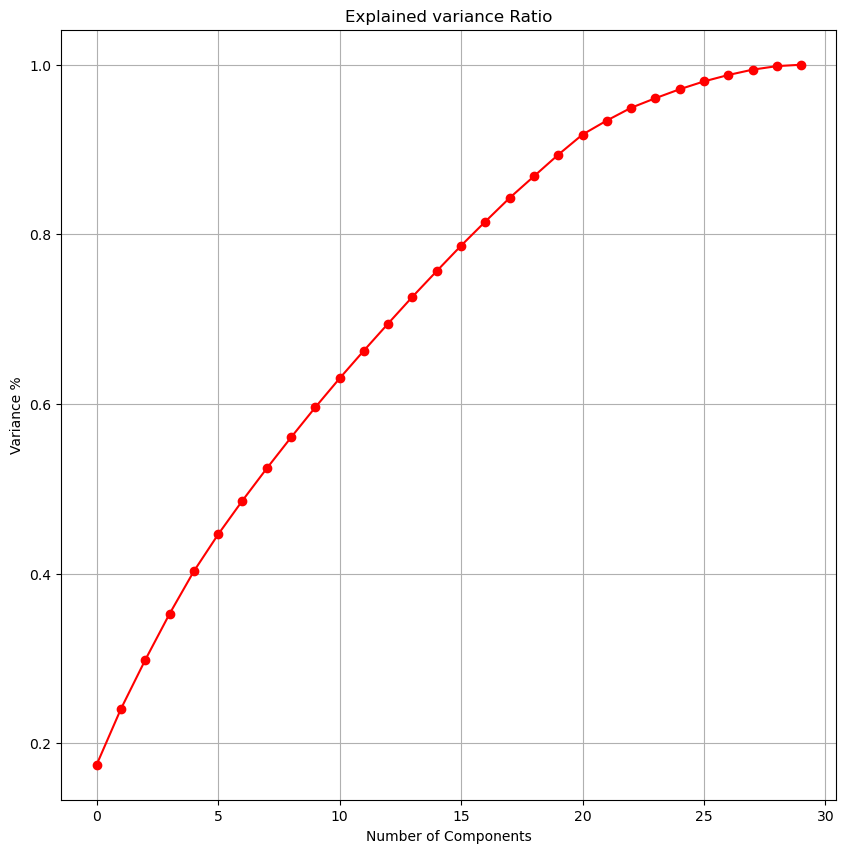

In [57]:
from sklearn.decomposition import PCA
pca = PCA()

x_pca = pca.fit_transform(X_scale)
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.xlabel('Number of Components')
plt.ylabel('Variance %')
plt.title('Explained variance Ratio')
plt.grid()

In [58]:
pca_new = PCA(n_components=21)
x_new = pca_new.fit_transform(X_scale)

In [59]:
principle_x=pd.DataFrame(x_new,columns=np.arange(21))

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score

In [61]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import BaggingClassifier

In [62]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=42, test_size=.33)
print('Training feature matrix size:',X_train.shape)
print('Training target vector size:',Y_train.shape)
print('Test feature matrix size:',X_test.shape)
print('Test target vector size:',Y_test.shape)

Training feature matrix size: (1652, 21)
Training target vector size: (1652,)
Test feature matrix size: (814, 21)
Test target vector size: (814,)


In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(principle_x,Y,test_size = 0.33, random_state=i)
    log_reg=LogisticRegression()
    log_reg.fit(X_train,Y_train)
    y_pred=log_reg.predict(X_test)
    acc=accuracy_score(Y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu ,'on Random_state', maxRS)

Best accuracy is 0.8587223587223587 on Random_state 241


In [64]:
X_train, X_test, Y_train, Y_test = train_test_split(principle_x, Y, random_state=242, test_size=.33)
log_reg=LogisticRegression()
log_reg.fit(X_train,Y_train)
y_pred=log_reg.predict(X_test)
print('\033[1m'+'Logistics Regression Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, y_pred))

Logistics Regression Evaluation


Accuracy Score of Logistics Regression : 0.8132678132678133


Confusion matrix of Logistics Regression : 
 [[304  91]
 [ 61 358]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

           0       0.83      0.77      0.80       395
           1       0.80      0.85      0.82       419

    accuracy                           0.81       814
   macro avg       0.82      0.81      0.81       814
weighted avg       0.81      0.81      0.81       814



In [65]:
from sklearn import neighbors
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = neighbors.KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train,Y_train)  #fit the model
    y_pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(Y_test,y_pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.3434182842192855
RMSE value for k=  2 is: 0.2953363967132856
RMSE value for k=  3 is: 0.3839533141153328
RMSE value for k=  4 is: 0.34697711796762676
RMSE value for k=  5 is: 0.39499323540999537
RMSE value for k=  6 is: 0.3839533141153328
RMSE value for k=  7 is: 0.41323319174731205
RMSE value for k=  8 is: 0.4011653785331692
RMSE value for k=  9 is: 0.42059978233966894
RMSE value for k=  10 is: 0.4026936331284146
RMSE value for k=  11 is: 0.41323319174731205
RMSE value for k=  12 is: 0.40724398810500057
RMSE value for k=  13 is: 0.4235105422078409
RMSE value for k=  14 is: 0.4176687376943293
RMSE value for k=  15 is: 0.42927285527410686
RMSE value for k=  16 is: 0.4235105422078409
RMSE value for k=  17 is: 0.4405714404080161
RMSE value for k=  18 is: 0.4264014327112209
RMSE value for k=  19 is: 0.43636875508873274
RMSE value for k=  20 is: 0.43070138785901946
RMSE value for k=  21 is: 0.4474882124097798
RMSE value for k=  22 is: 0.4335443321745632
RMSE value

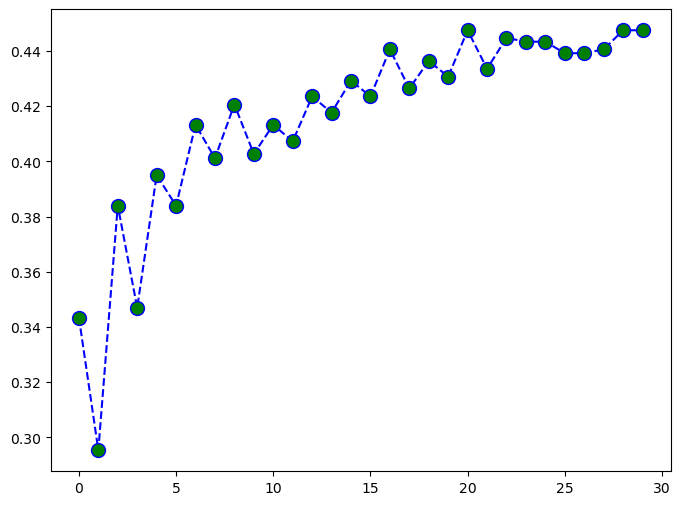

In [66]:
plt.figure(figsize = (8,6))
plt.plot(range(30), rmse_val, color='blue', linestyle='dashed', marker='o', markerfacecolor='green', markersize=10)

In [67]:
model=[
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 22),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    m.fit(X_train,Y_train)
    y_pred=m.predict(X_test)
    print('\033[1m'+'Classification ML Algorithm Evaluation Matrix',m,'is' +'\033[0m')
    print('\n')
    print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Confusion matrix :'+'\033[0m \n',confusion_matrix(Y_test, y_pred))
    print('\n')
    print('\033[1m'+'Classification Report :'+'\033[0m \n',classification_report(Y_test, y_pred))
    print('\n')
    print('============================================================================================================')


Classification ML Algorithm Evaluation Matrix SVC() is


Accuracy Score :
 0.8771498771498771


Confusion matrix : 
 [[336  59]
 [ 41 378]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.85      0.87       395
           1       0.86      0.90      0.88       419

    accuracy                           0.88       814
   macro avg       0.88      0.88      0.88       814
weighted avg       0.88      0.88      0.88       814



Classification ML Algorithm Evaluation Matrix GaussianNB() is


Accuracy Score :
 0.8144963144963145


Confusion matrix : 
 [[313  82]
 [ 69 350]]


Classification Report : 
               precision    recall  f1-score   support

           0       0.82      0.79      0.81       395
           1       0.81      0.84      0.82       419

    accuracy                           0.81       814
   macro avg       0.81      0.81      0.81       814
weighted avg       0.81      0.81      0.81       814




In [68]:
from sklearn.model_selection import cross_val_score
model=[LogisticRegression(),
        SVC(),
        GaussianNB(),
        DecisionTreeClassifier(),
        KNeighborsClassifier(n_neighbors = 12),
        RandomForestClassifier(),
        AdaBoostClassifier(),
        GradientBoostingClassifier(),
        BaggingClassifier()]

for m in model:
    score = cross_val_score(m, X, Y, cv =5)
    print('\n')
    print('\033[1m'+'Cross Validation Score', m, ':'+'\033[0m\n')
    print("Score :" ,score)
    print("Mean Score :",score.mean())
    print("Std deviation :",score.std())
    print('\n')
    print('============================================================================================================')



Cross Validation Score LogisticRegression() :

Score : [0.63967611 0.73833671 0.71602434 0.69776876 0.73427992]
Mean Score : 0.7052171699337281
Std deviation : 0.035803495313148345




Cross Validation Score SVC() :

Score : [0.58299595 0.65922921 0.60243408 0.63083164 0.60446247]
Mean Score : 0.6159906710136239
Std deviation : 0.026439204534734112




Cross Validation Score GaussianNB() :

Score : [0.67004049 0.78093306 0.7484787  0.7464503  0.77079108]
Mean Score : 0.7433387259692373
Std deviation : 0.038924796509812155




Cross Validation Score DecisionTreeClassifier() :

Score : [0.70242915 0.90466531 0.87829615 0.90263692 0.90872211]
Mean Score : 0.8593499273225973
Std deviation : 0.07918074231328544




Cross Validation Score KNeighborsClassifier(n_neighbors=12) :

Score : [0.71659919 0.73833671 0.75456389 0.77281947 0.73022312]
Mean Score : 0.742508479030311
Std deviation : 0.019512632813495905




Cross Validation Score RandomForestClassifier() :

Score : [0.69838057 0.98174

In [69]:
from sklearn.model_selection import GridSearchCV

In [70]:
parameter = {  'bootstrap': [True], 'max_depth': [5, 10,20,40,50, None], 
              'max_features': ['auto', 'log2'], 
              'criterion':['gini','entropy'],
              'n_estimators': [5, 10, 15 ,25,50,100]}

In [71]:
GCV = GridSearchCV(RandomForestClassifier(),parameter,cv=5,n_jobs = -1,verbose=3)
GCV.fit(X_train,Y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 20, 40, 50, None],
                         'max_features': ['auto', 'log2'],
                         'n_estimators': [5, 10, 15, 25, 50, 100]},
             verbose=3)

In [72]:
GCV.best_params_

{'bootstrap': True,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'n_estimators': 100}

## FINAL MODEL

In [73]:
Final_mod = RandomForestClassifier(bootstrap=True,criterion='entropy',n_estimators= 25, max_depth=20 ,max_features='log2')
Final_mod.fit(X_train,Y_train)
y_pred=Final_mod.predict(X_test)
print('\033[1m'+'Accuracy Score :'+'\033[0m\n', accuracy_score(Y_test, y_pred))

Accuracy Score :
 0.8759213759213759


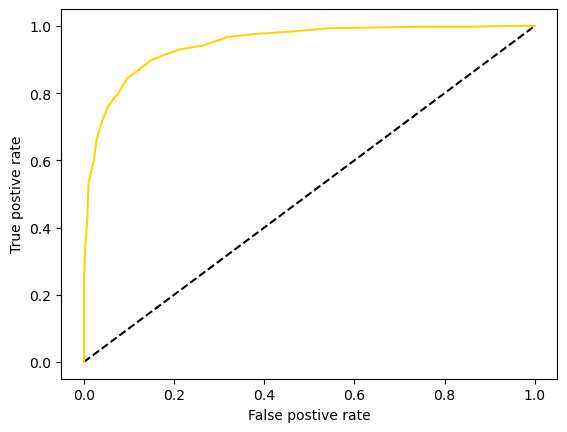

Auc Score :
 0.8753421346787107


In [74]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

y_pred_prob = Final_mod.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(Y_test,y_pred_prob)
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr, tpr, label='Random Forest Classifier')
plt.xlabel('False postive rate')
plt.ylabel('True postive rate')
plt.show()
auc_score = roc_auc_score(Y_test, Final_mod.predict(X_test))
print('\033[1m'+'Auc Score :'+'\033[0m\n',auc_score)

## SAVING MODEL

In [75]:
import joblib
joblib.dump(Final_mod,'IBM_HR_Analytics_Final.pkl')

['IBM_HR_Analytics_Final.pkl']